In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install patchify

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
# Step 4: Load the image from Google Drive
image_path = '/content/drive/MyDrive/Colab Notebooks/Leaf Disease/Tomato_Train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'
image = cv2.imread(image_path)

In [5]:
height, width, channels = image.shape
# Print the dimensions
print(f"Image dimensions: Height = {height}, Width = {width}, Channels = {channels}")

Image dimensions: Height = 256, Width = 256, Channels = 3


In [6]:
patch_size = (16,16)

# Calculate the number of patches in each dimension
num_patches_height = image.shape[0] // patch_size[0]
num_patches_width = image.shape[1] // patch_size[1]

# create patches to iterate through the image
patches = []
for i in range(num_patches_height):
    for j in range(num_patches_width):
        patch = image[i * patch_size[0]: (i + 1) * patch_size[0], j * patch_size[1]: (j + 1) * patch_size[1]]
        patches.append(patch)


print("Image has been divided into patches.")

Image has been divided into patches.


<ipython-input-7-f5fffe1fe0d9>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


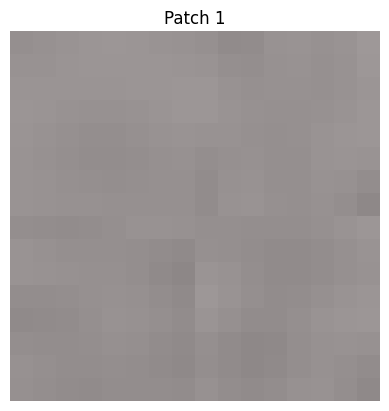

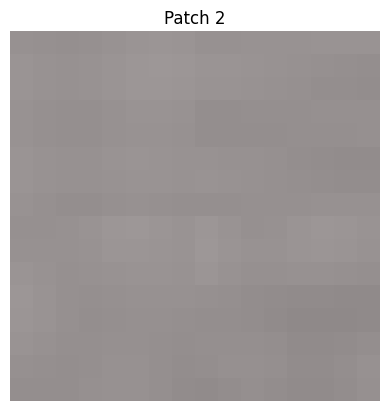

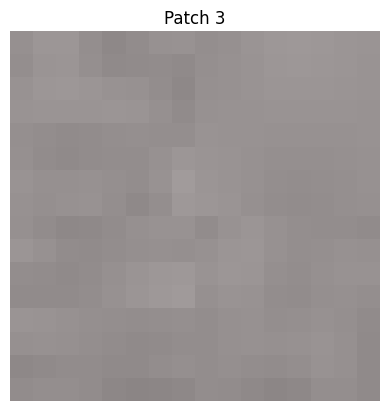

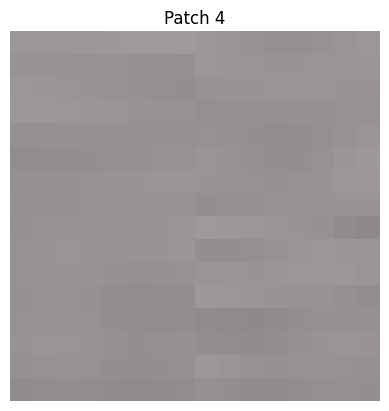

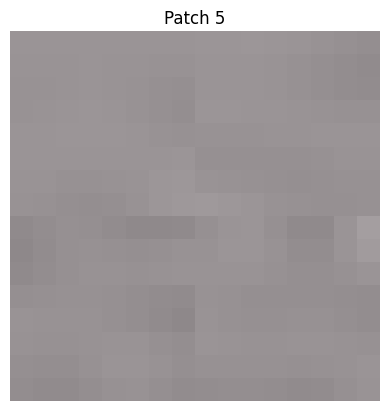

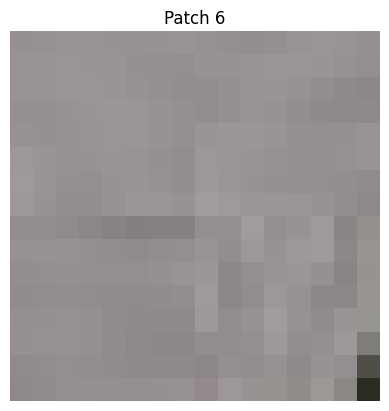

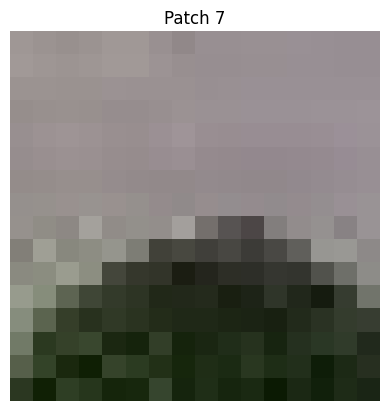

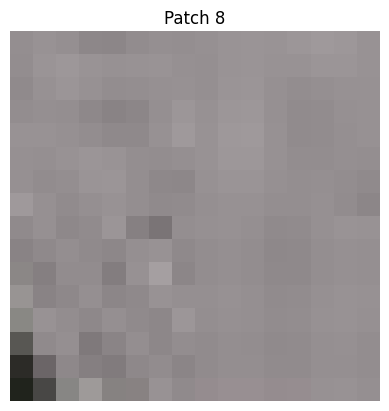

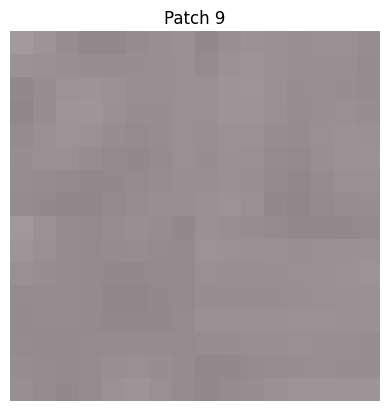

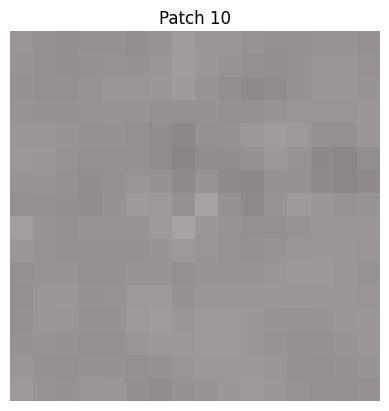

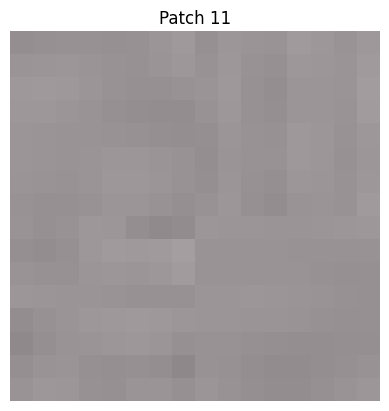

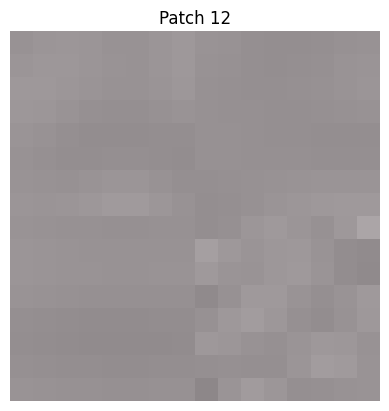

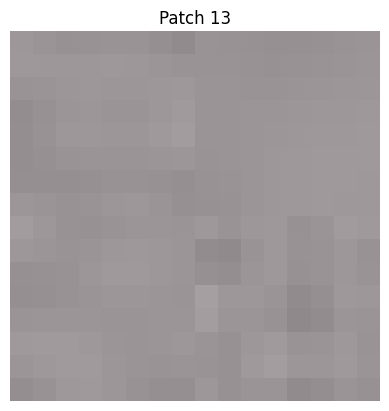

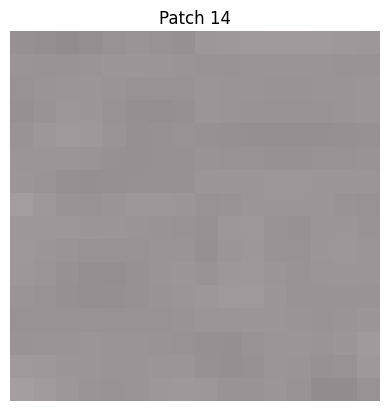

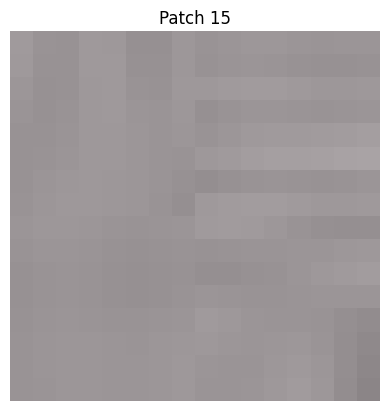

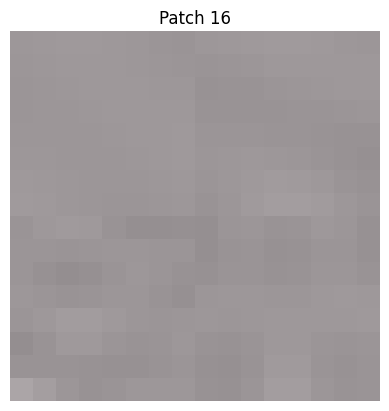

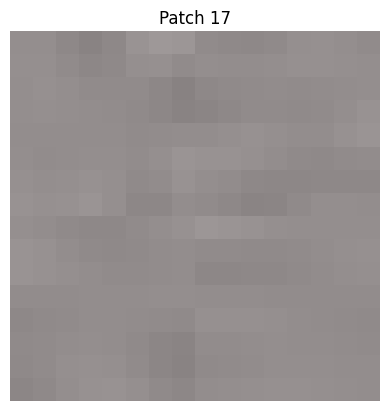

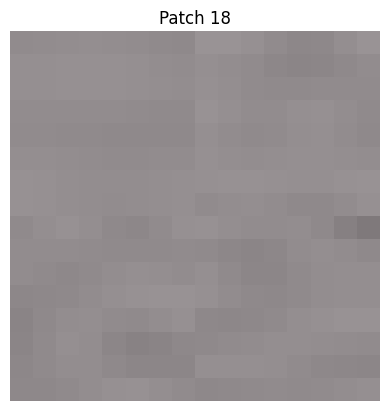

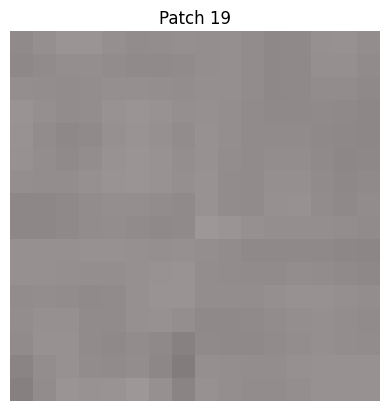

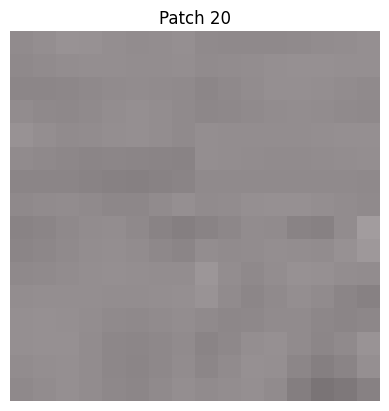

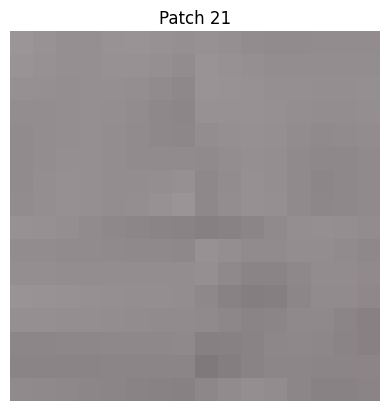

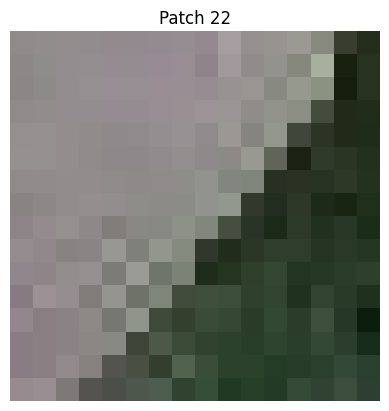

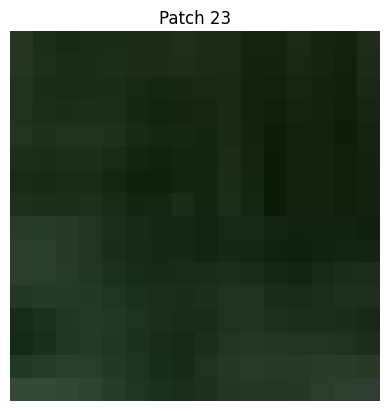

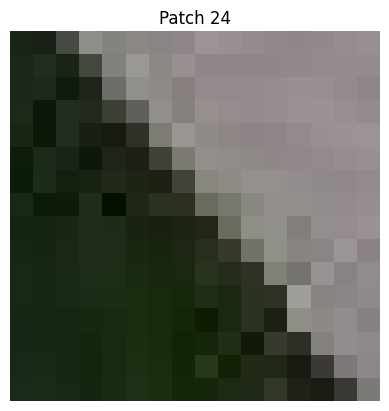

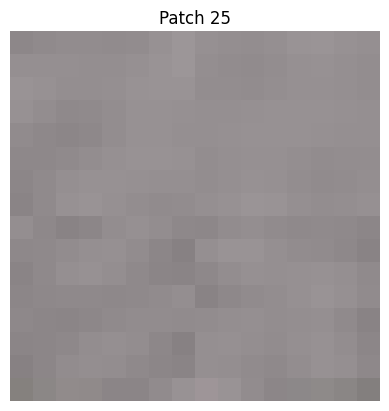

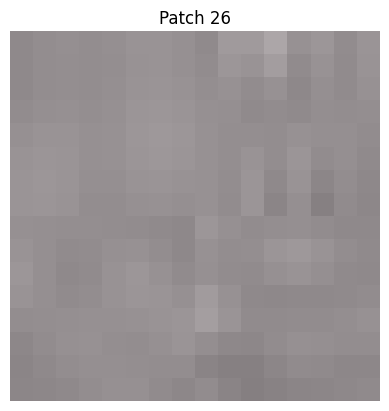

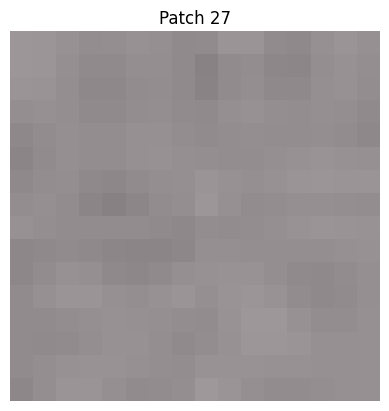

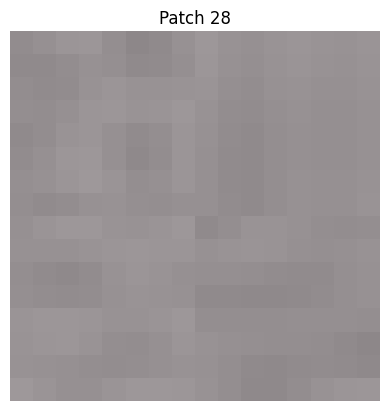

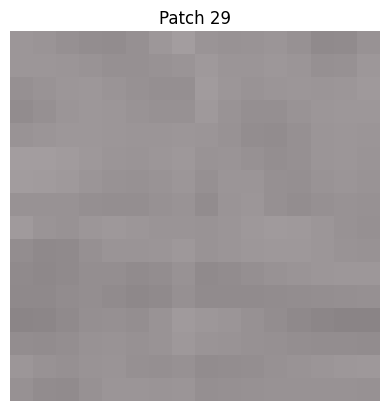

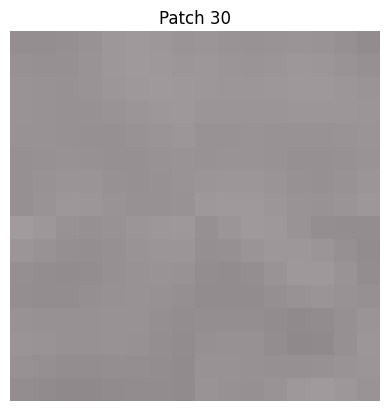

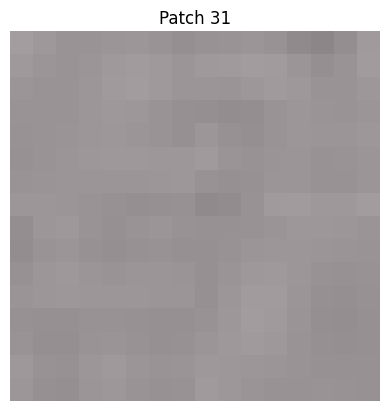

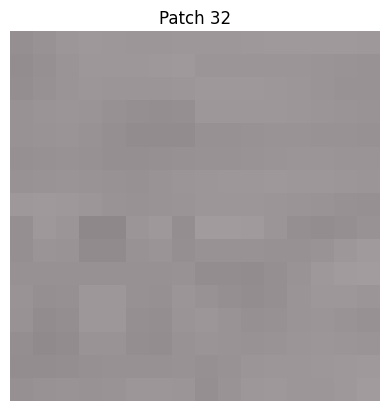

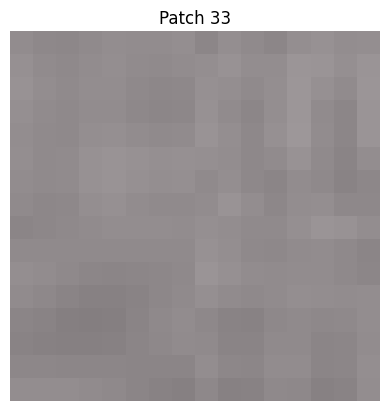

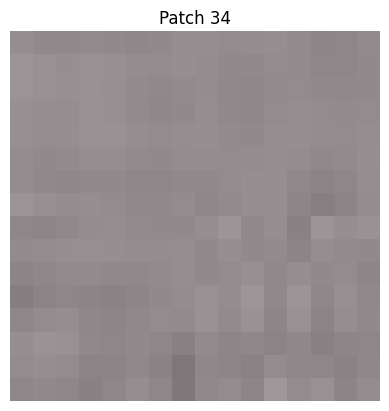

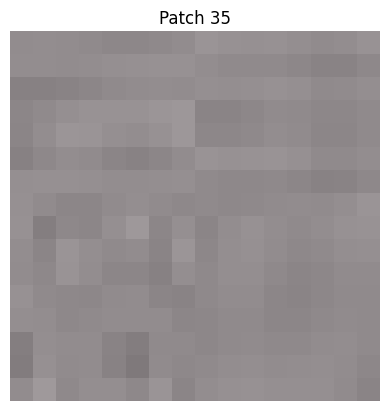

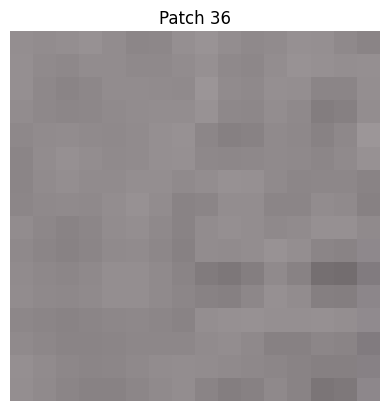

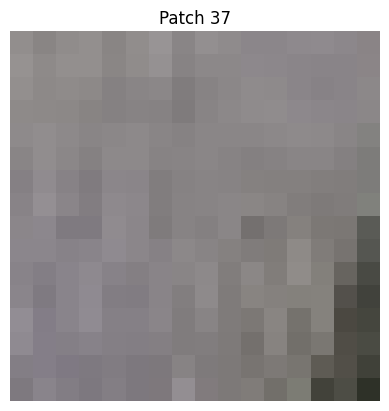

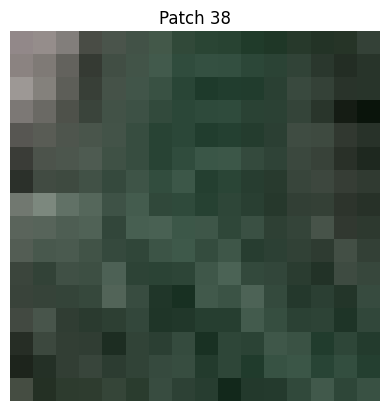

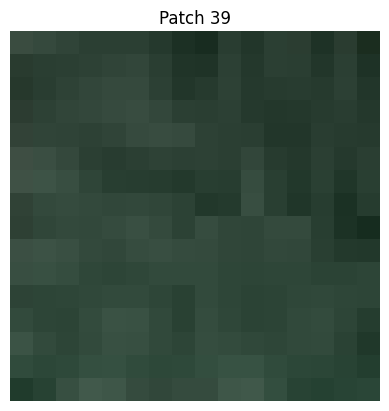

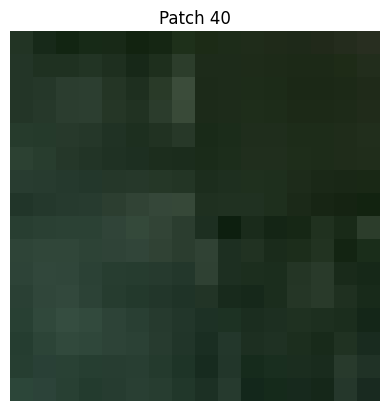

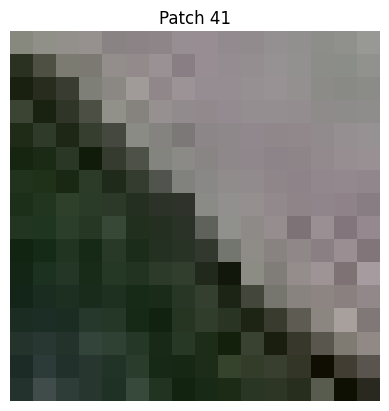

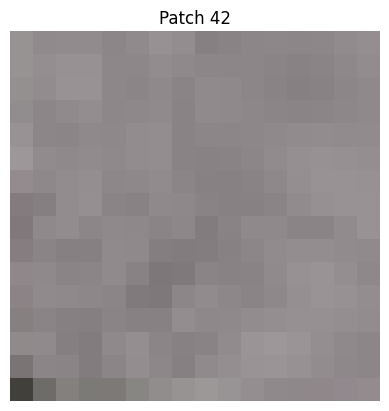

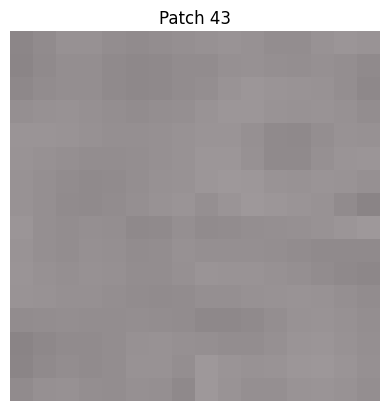

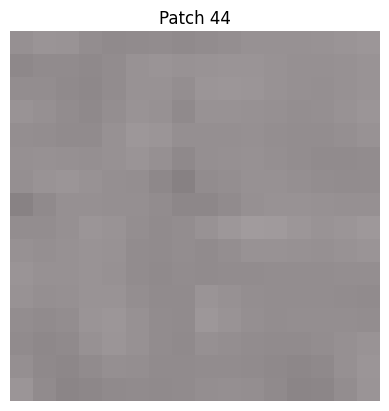

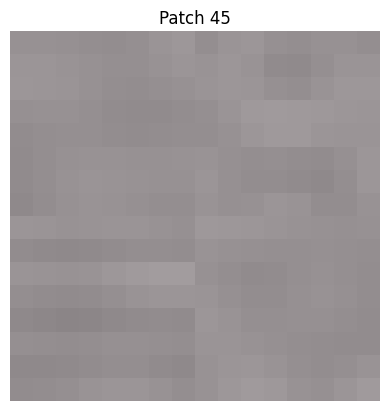

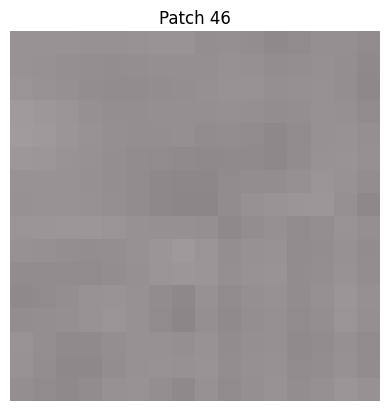

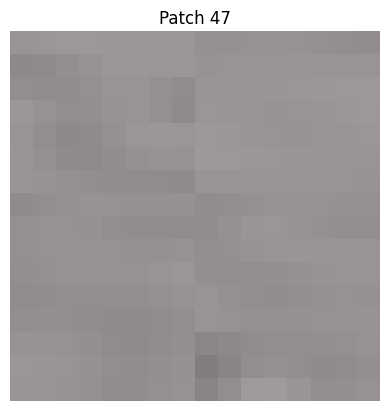

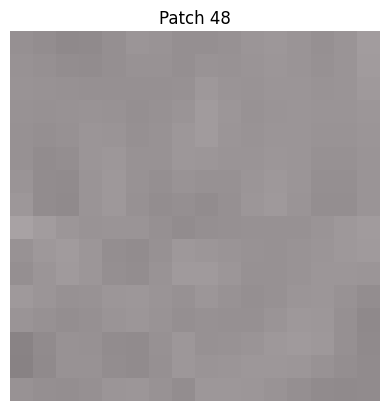

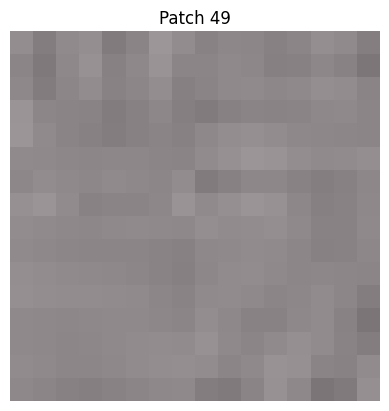

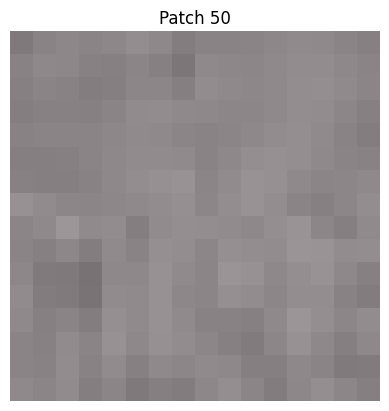

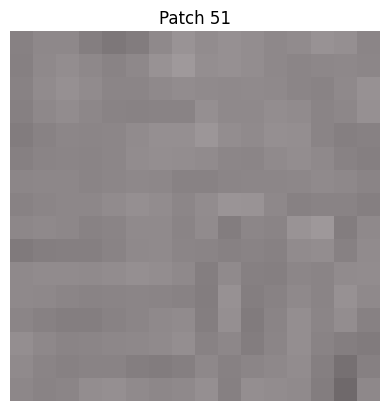

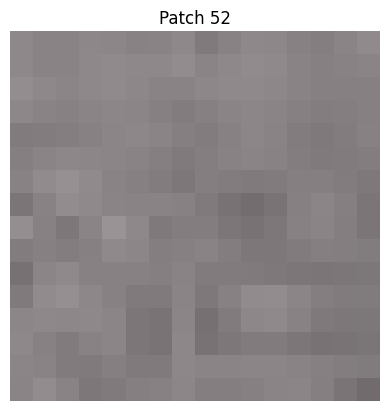

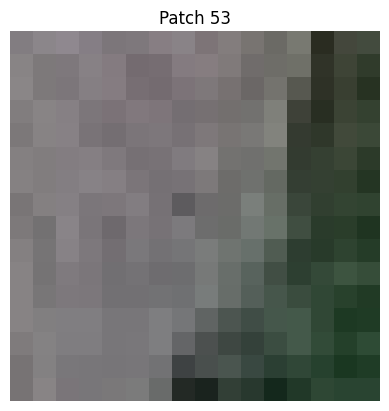

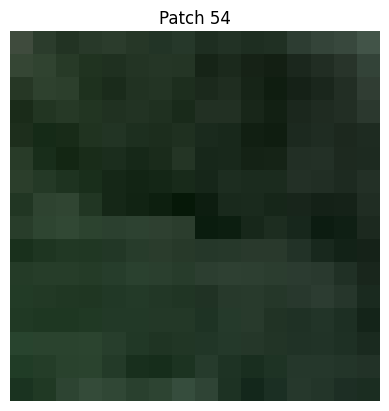

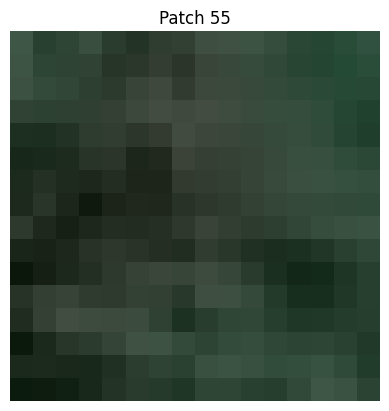

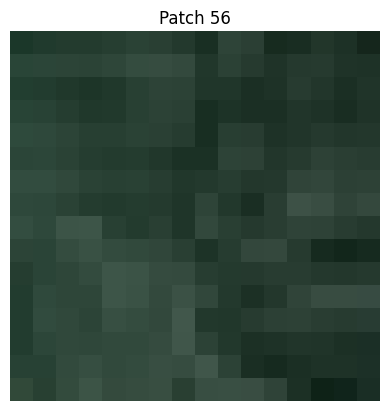

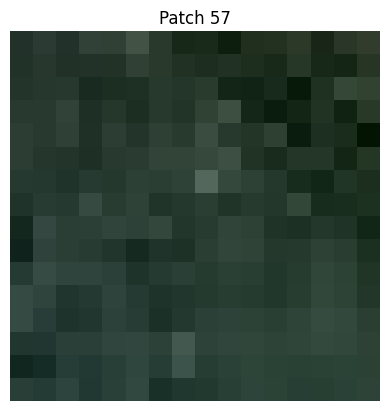

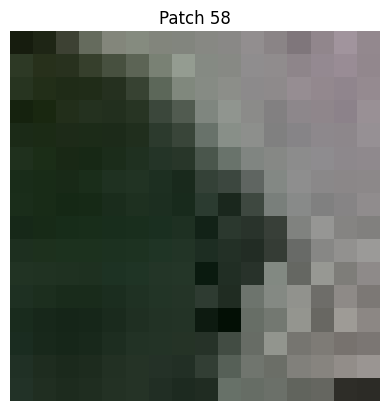

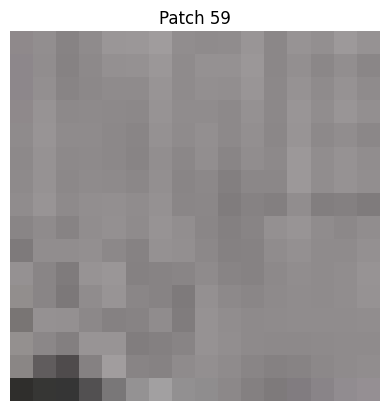

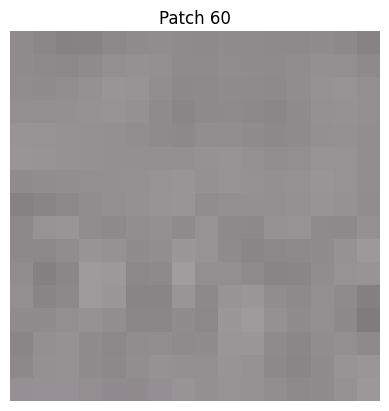

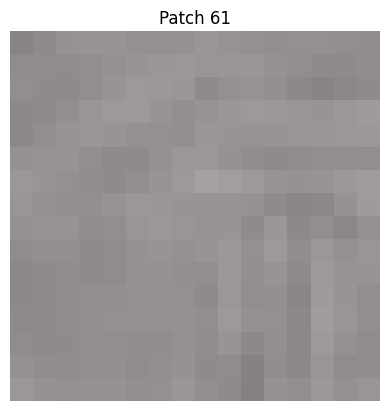

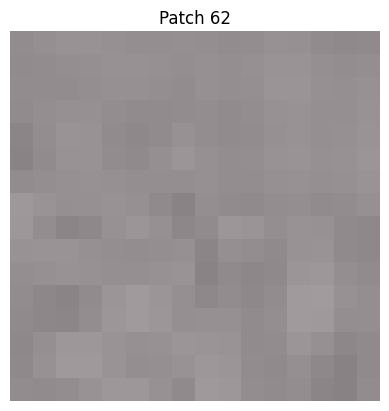

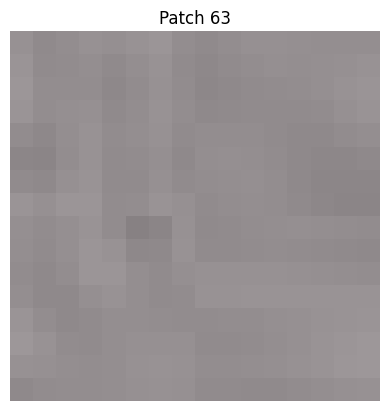

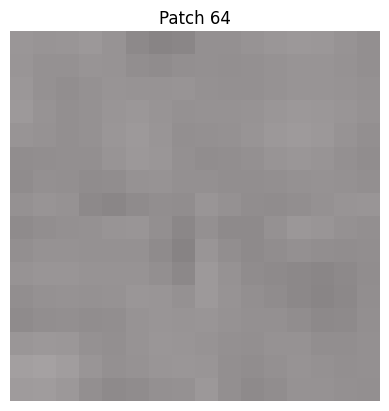

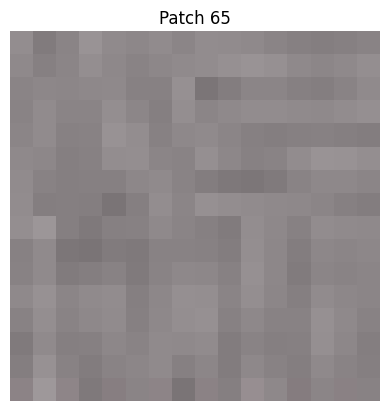

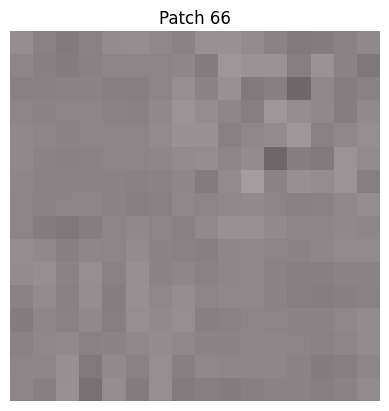

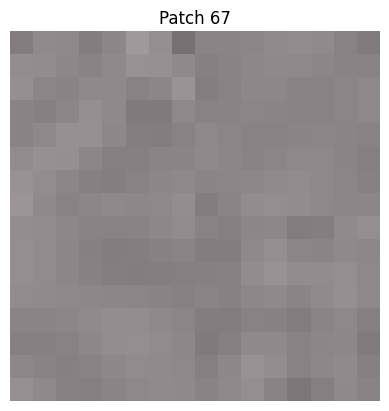

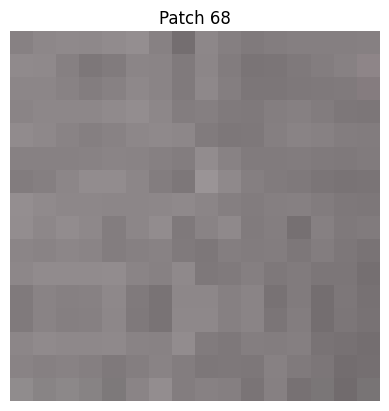

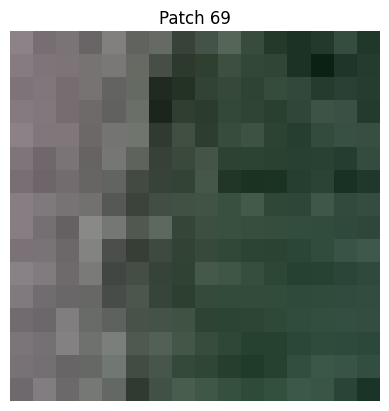

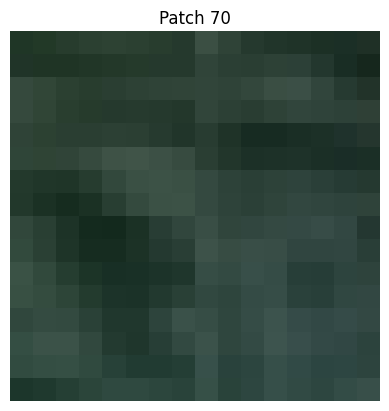

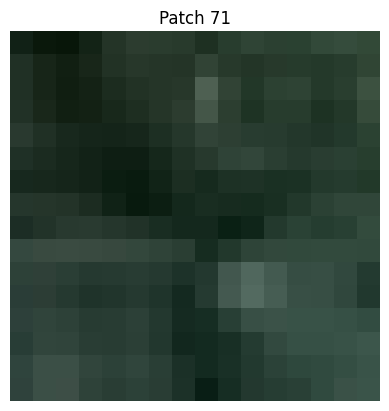

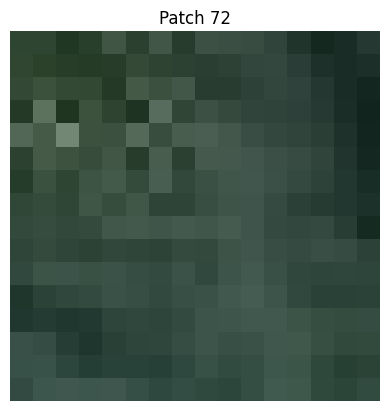

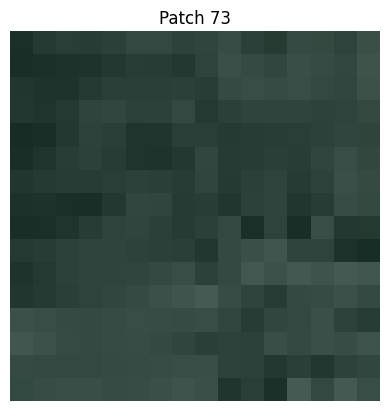

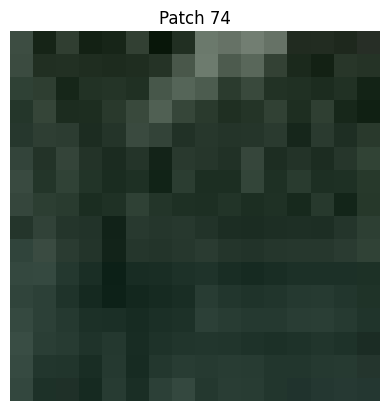

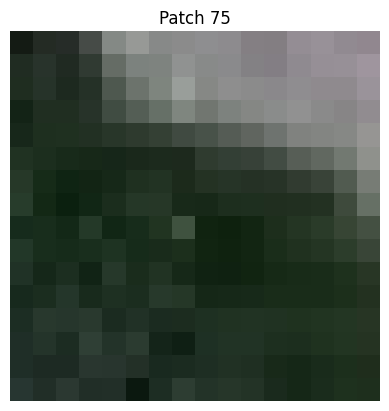

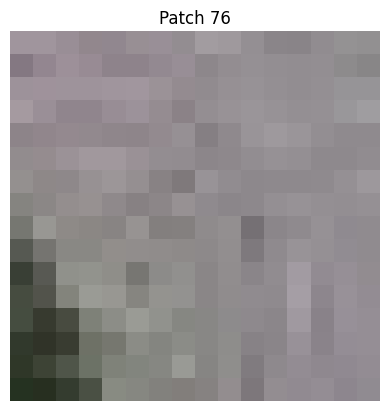

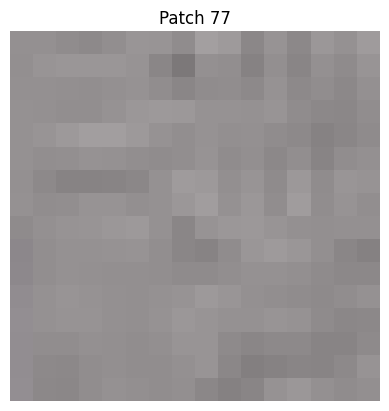

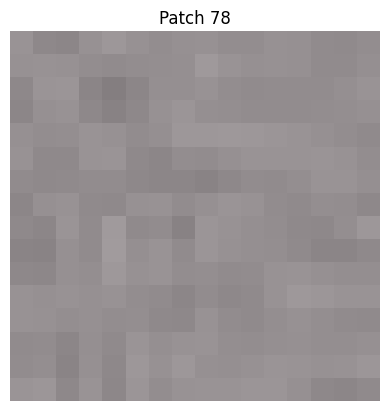

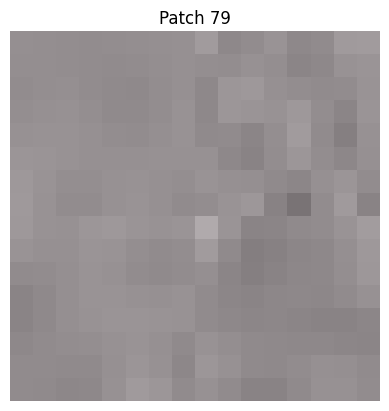

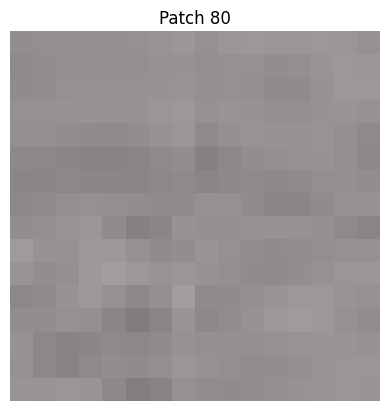

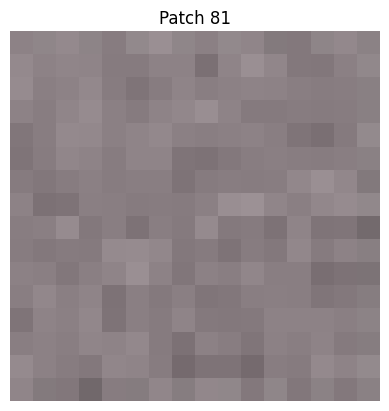

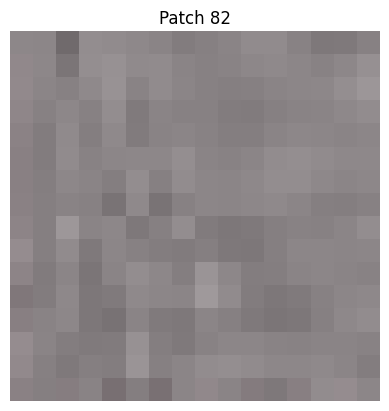

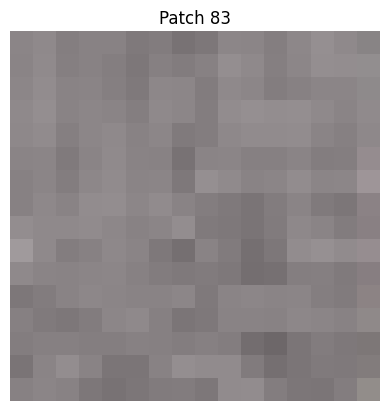

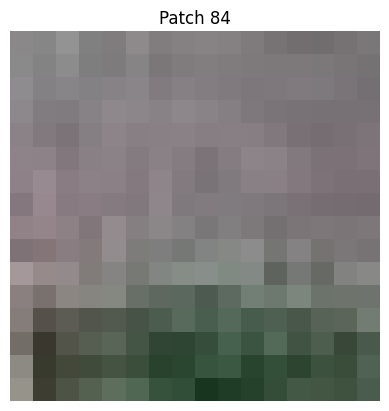

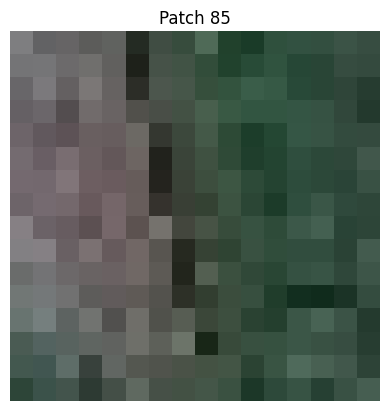

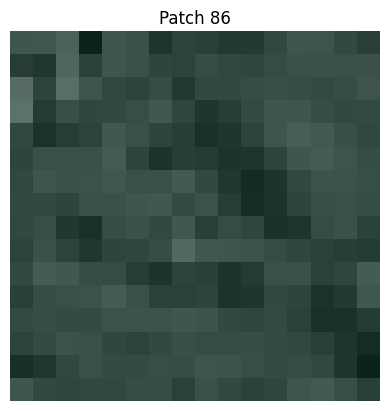

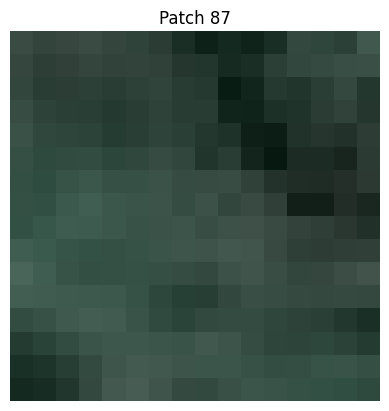

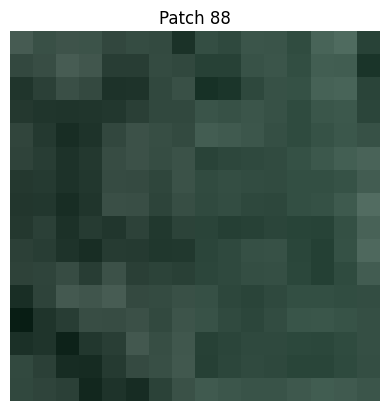

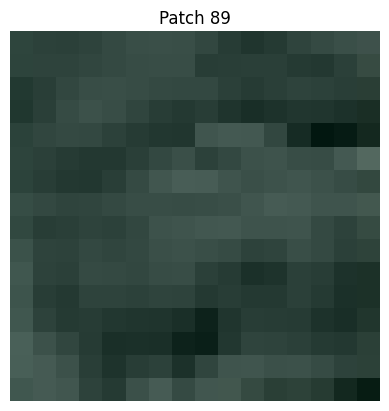

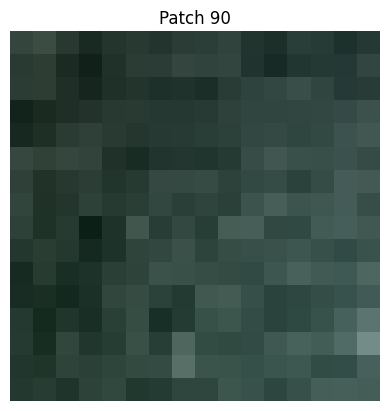

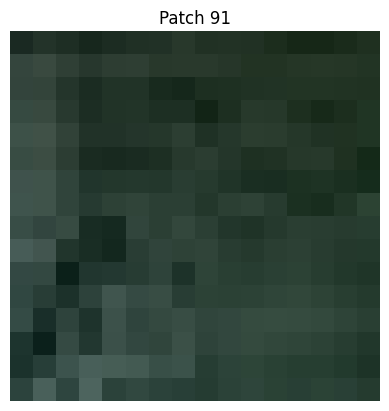

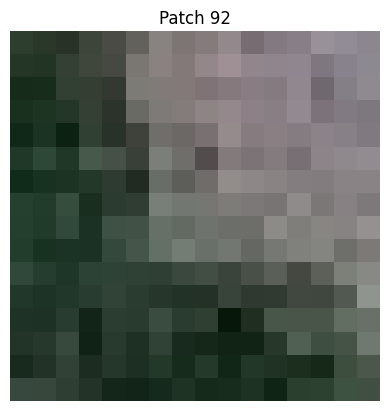

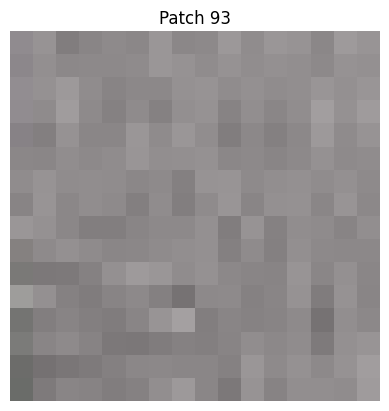

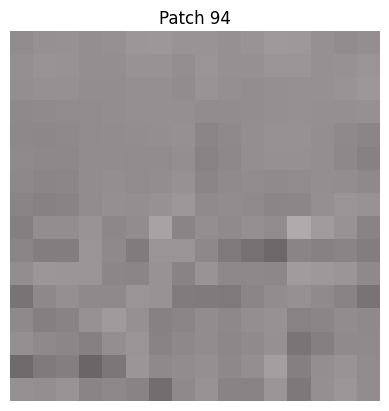

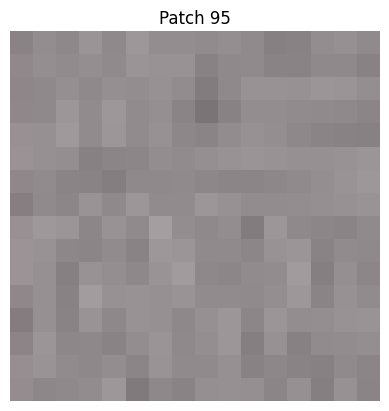

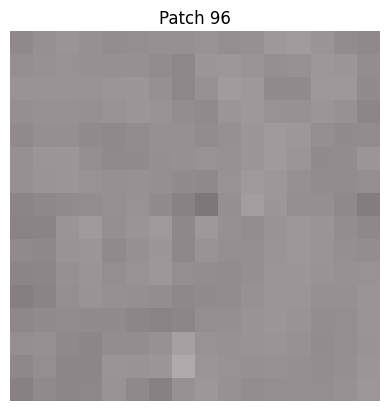

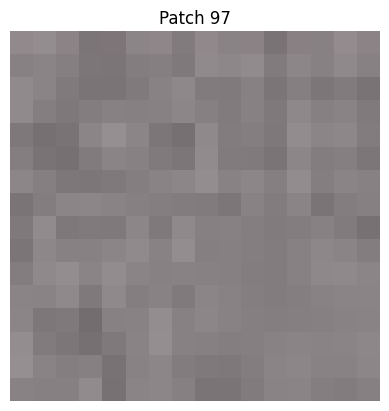

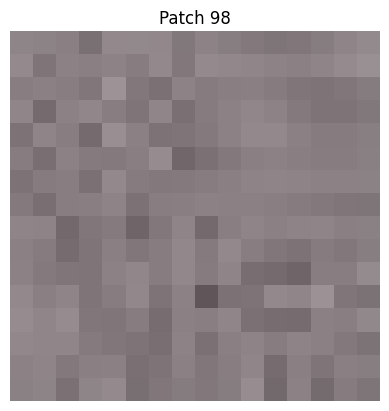

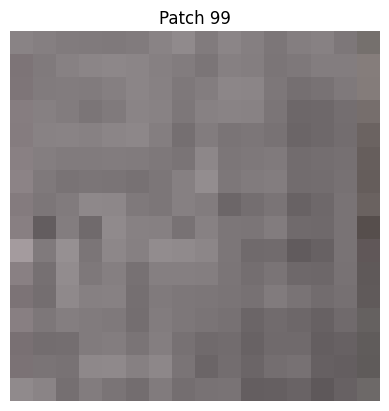

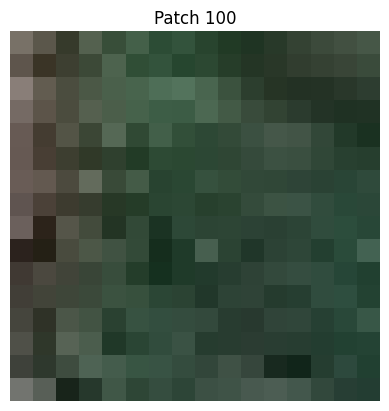

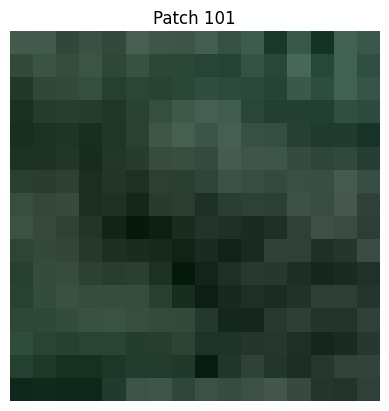

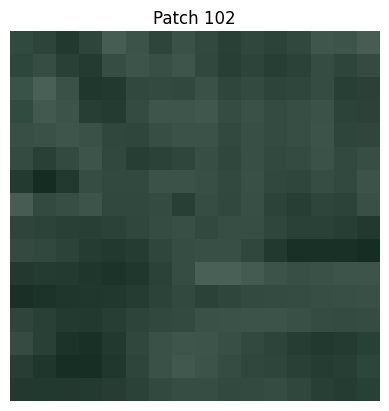

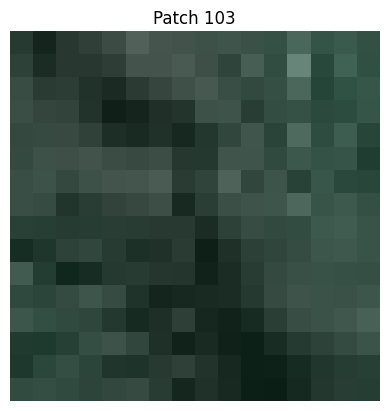

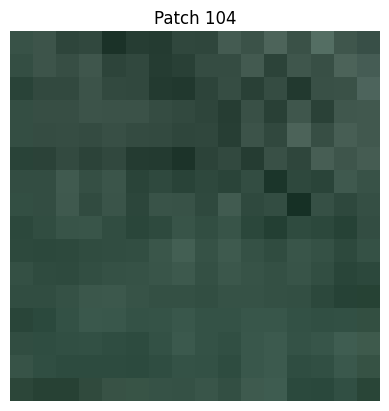

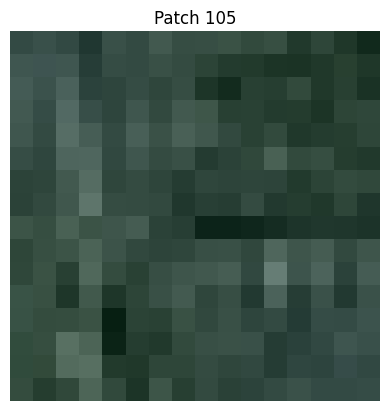

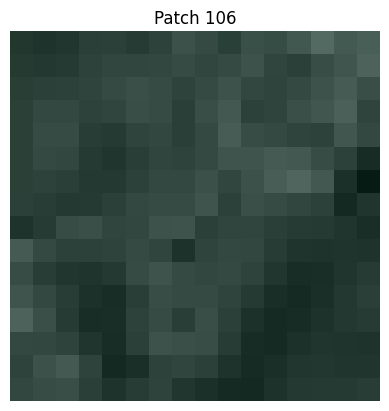

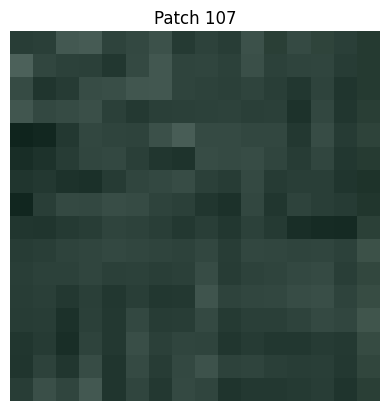

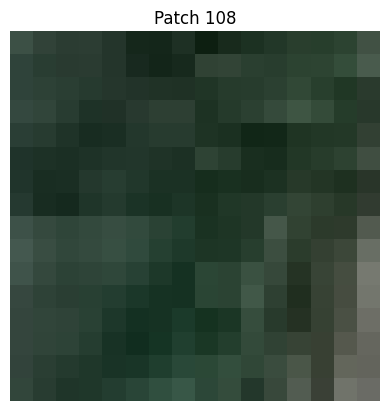

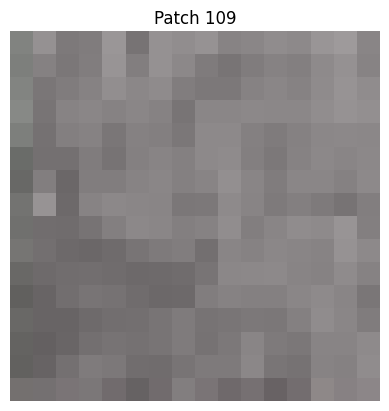

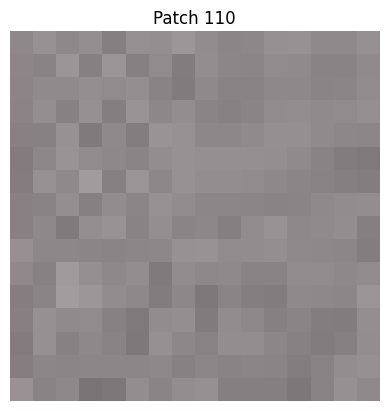

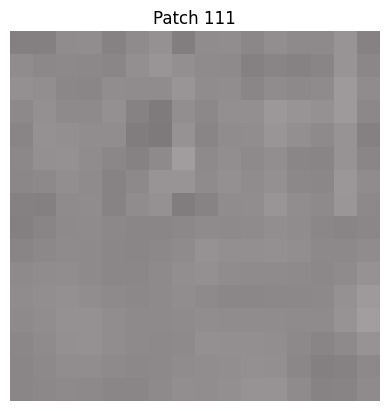

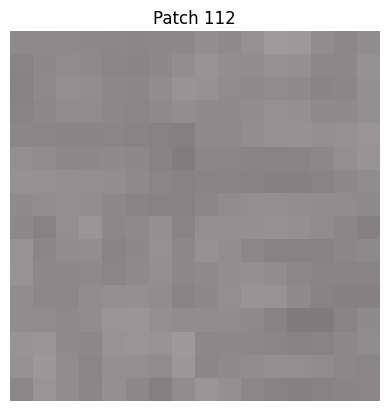

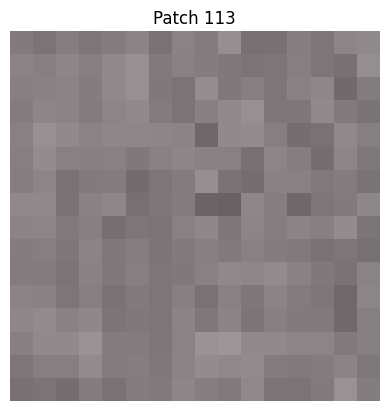

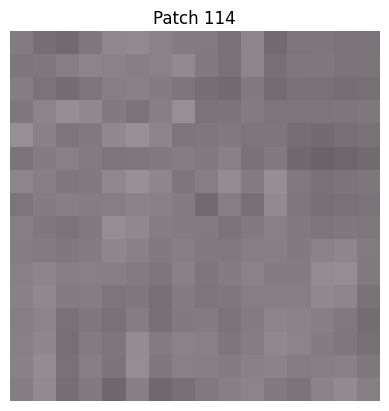

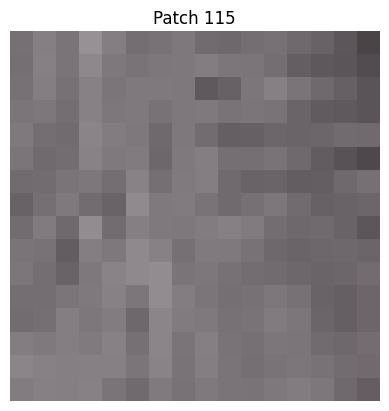

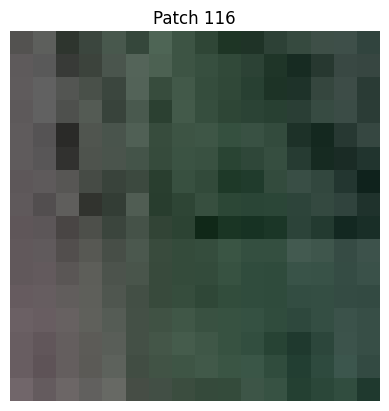

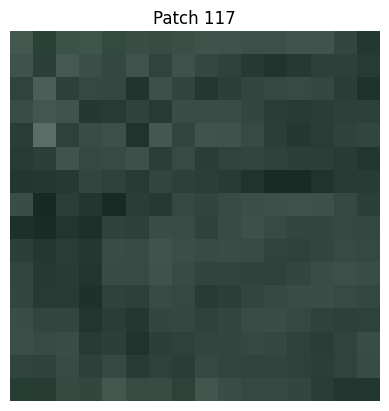

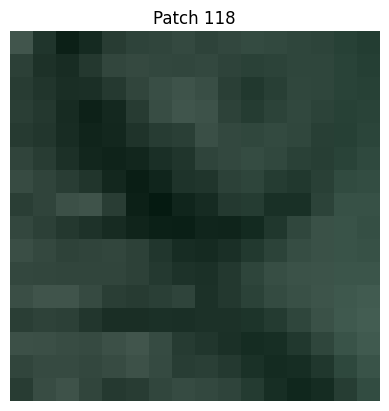

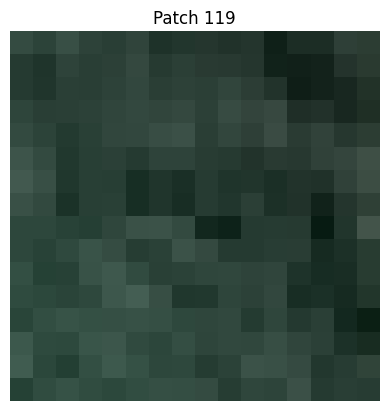

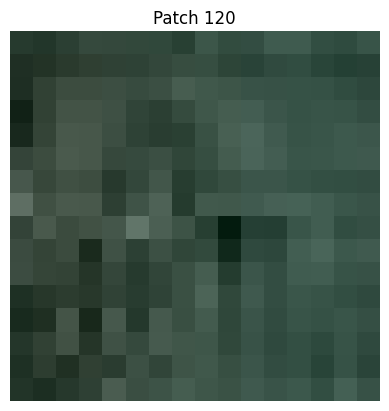

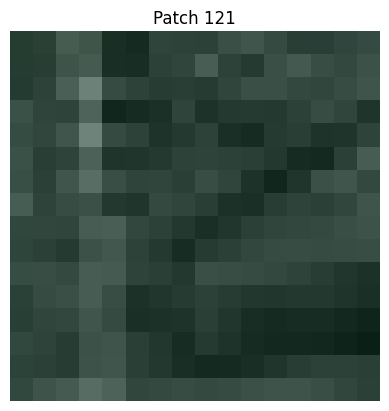

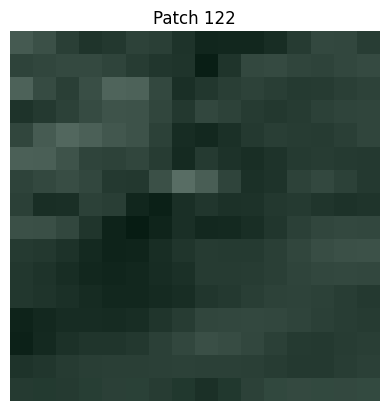

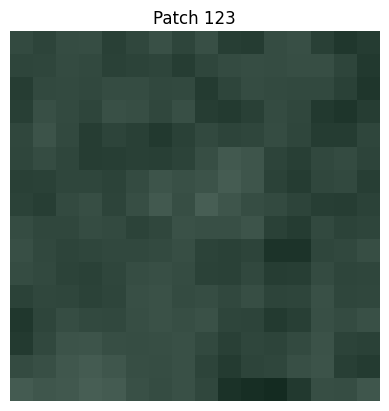

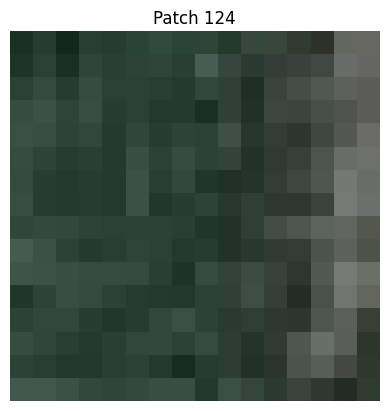

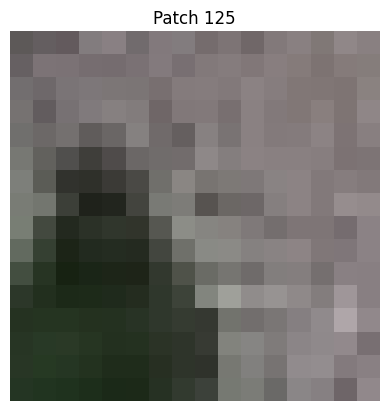

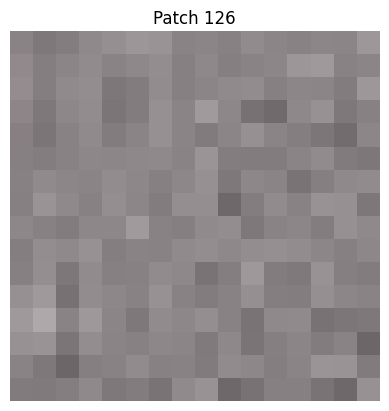

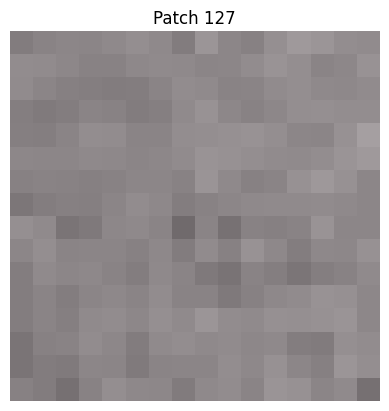

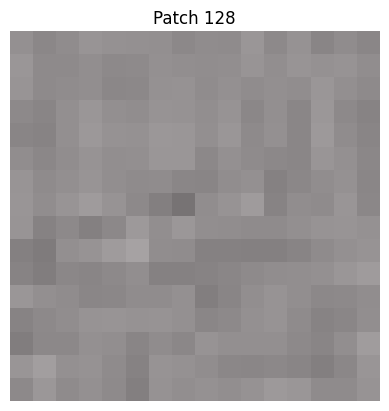

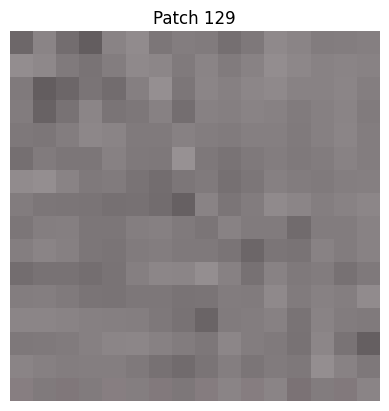

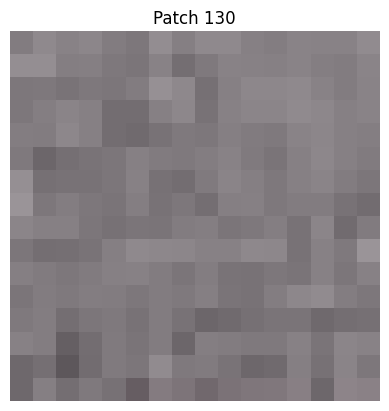

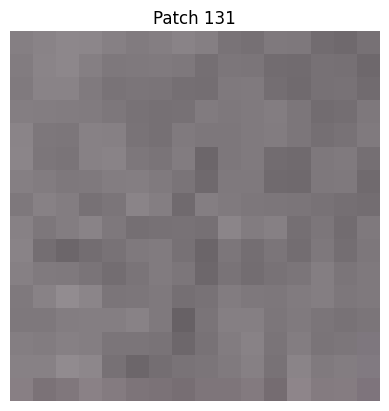

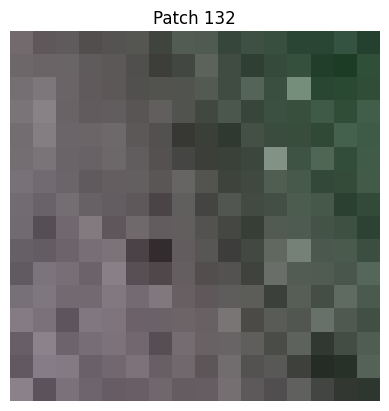

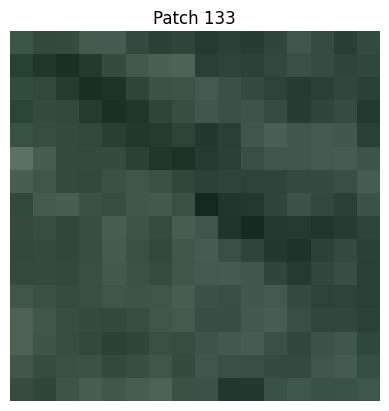

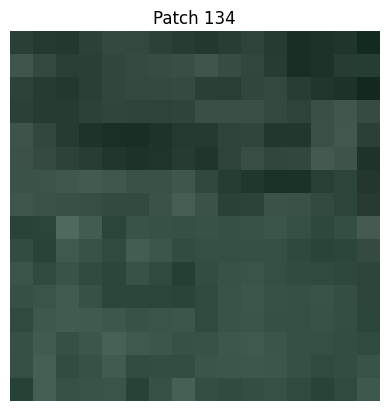

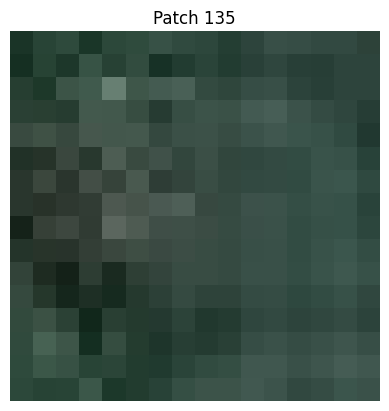

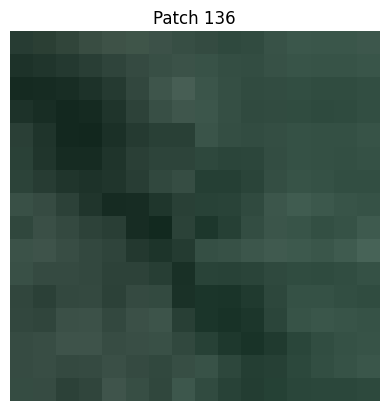

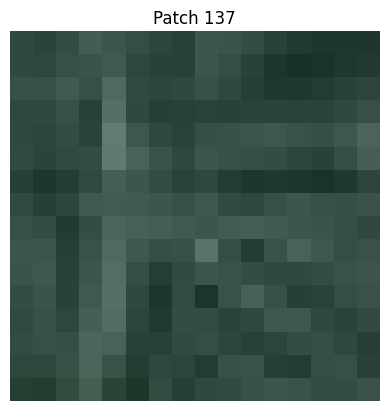

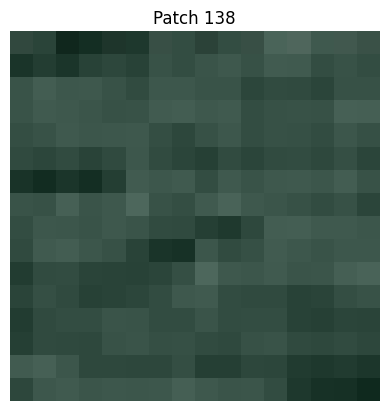

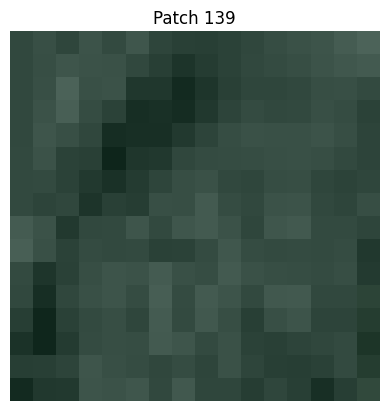

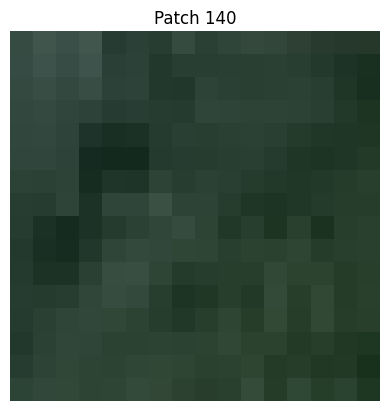

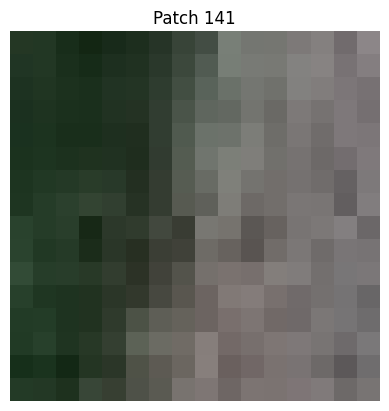

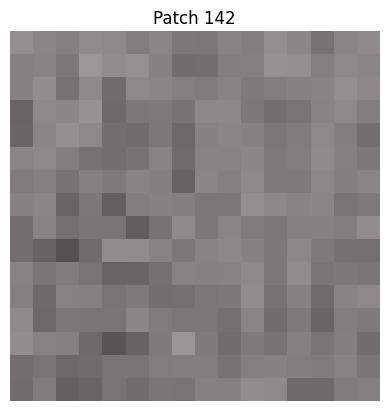

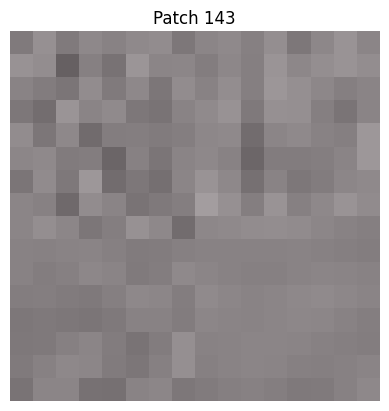

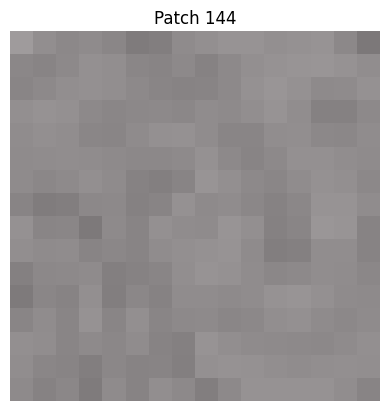

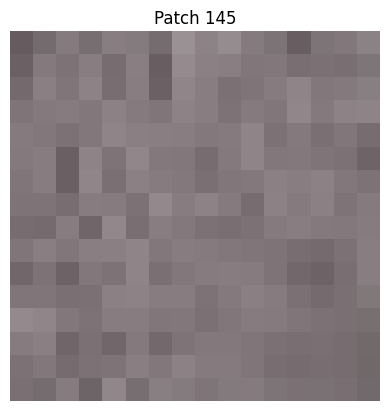

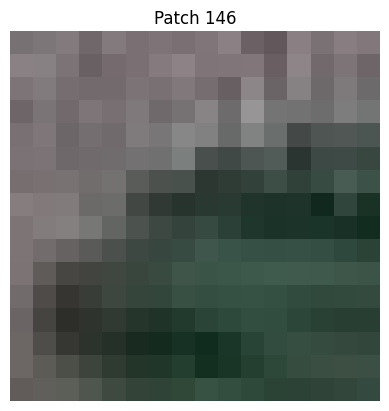

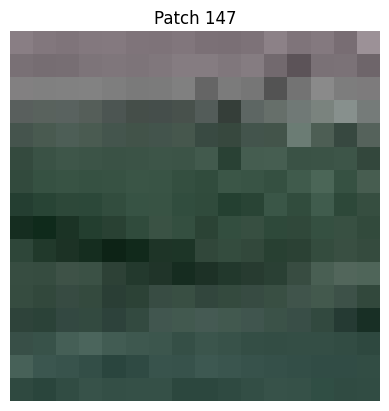

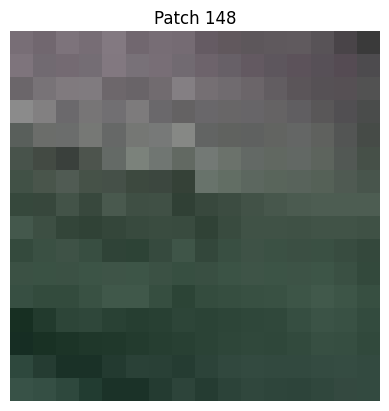

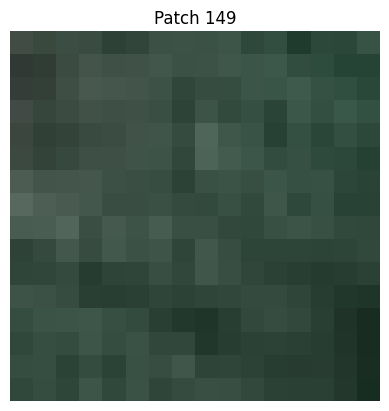

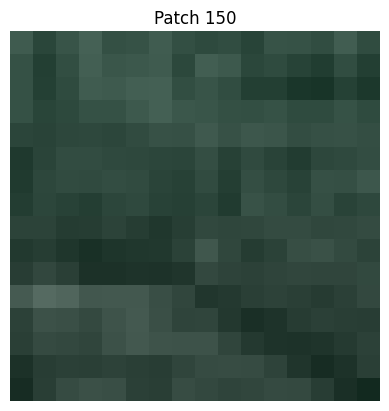

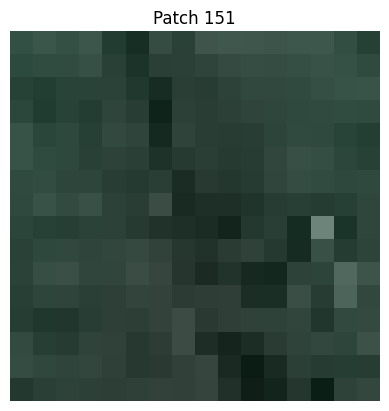

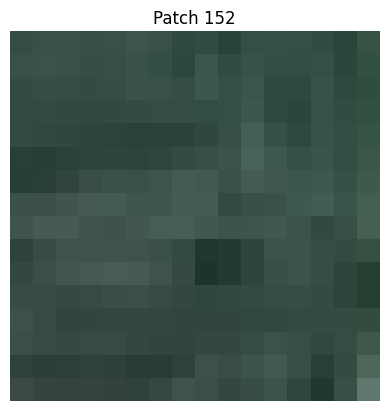

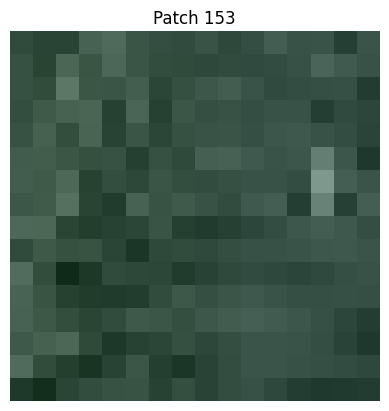

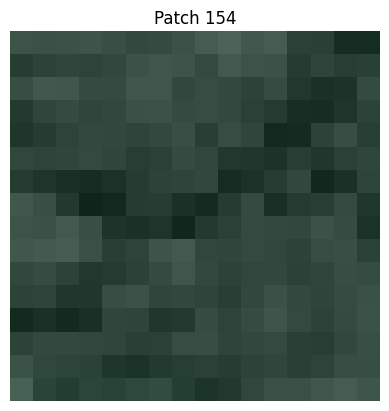

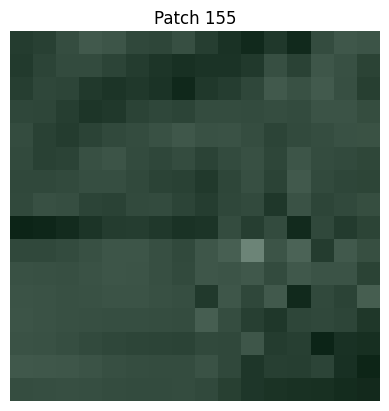

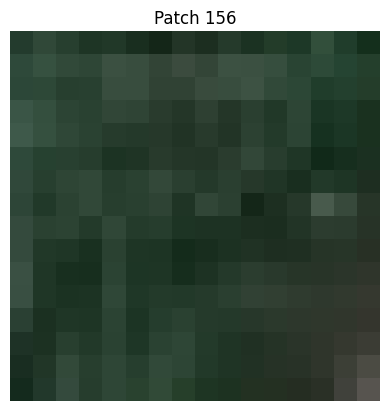

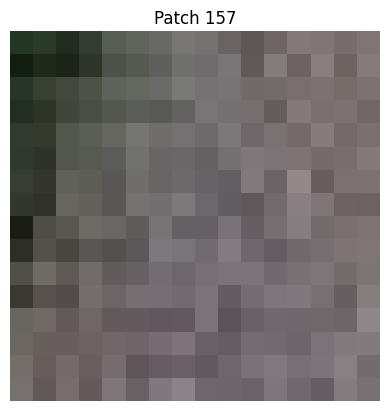

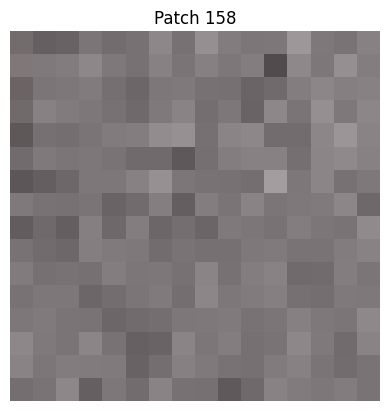

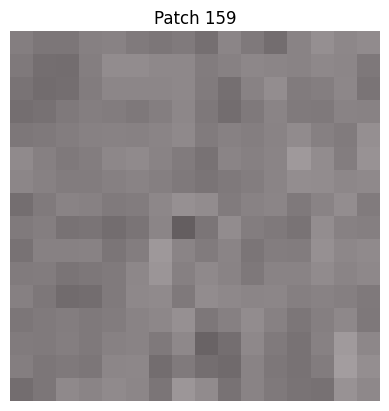

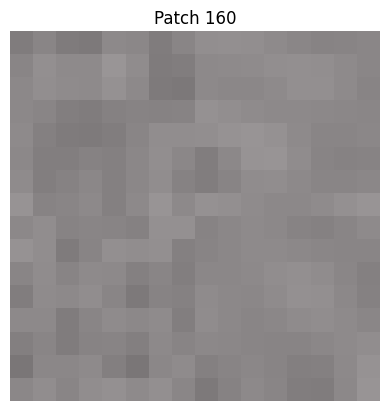

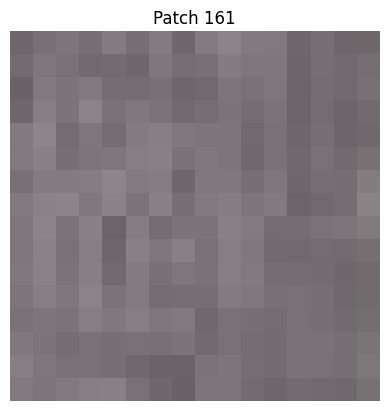

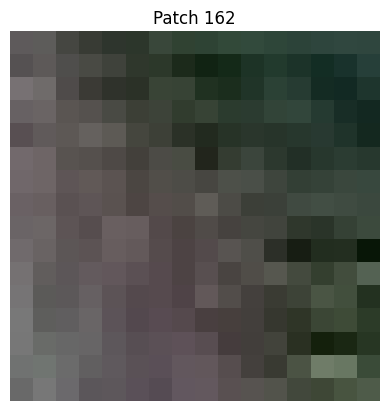

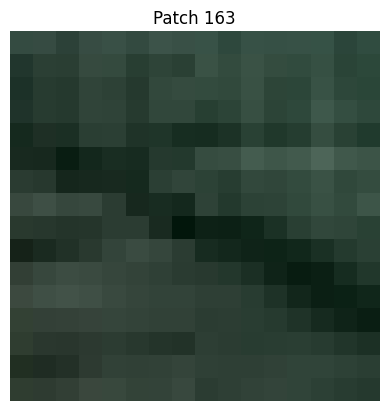

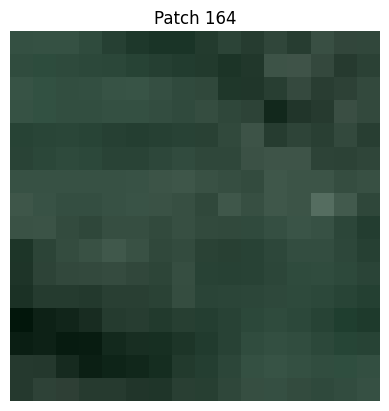

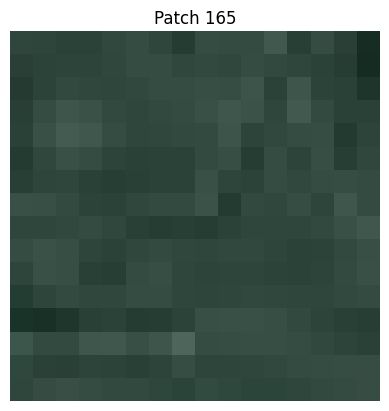

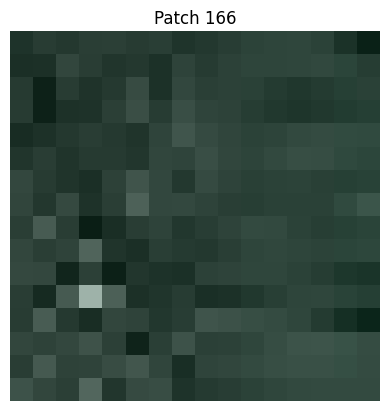

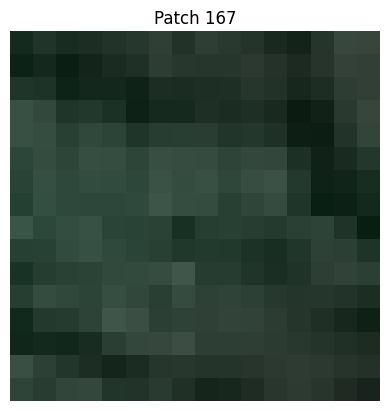

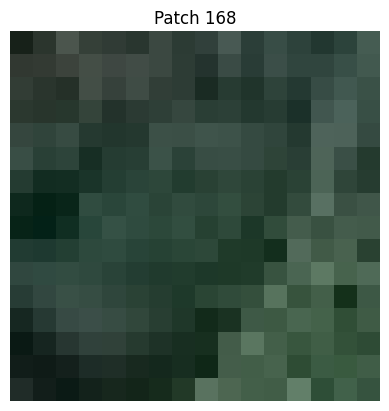

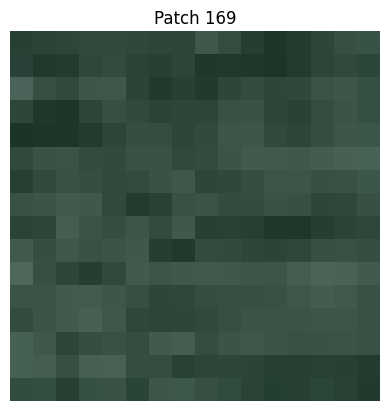

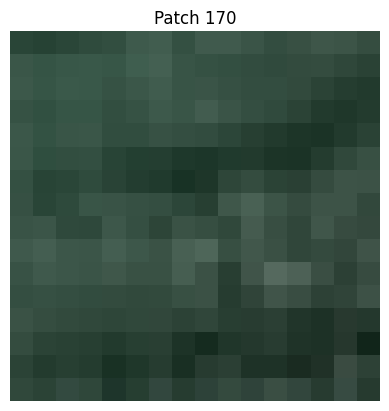

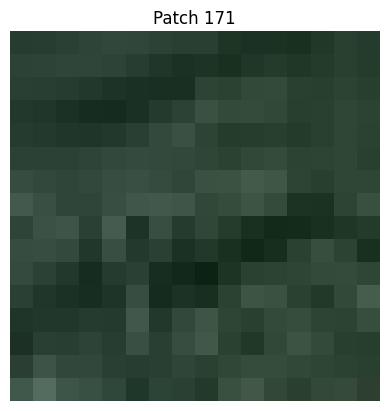

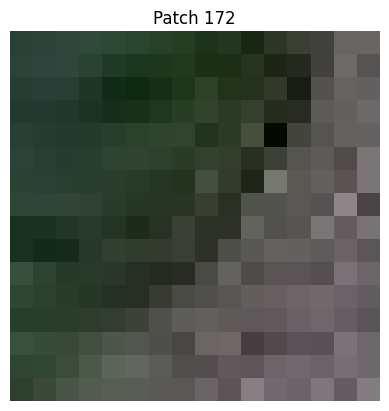

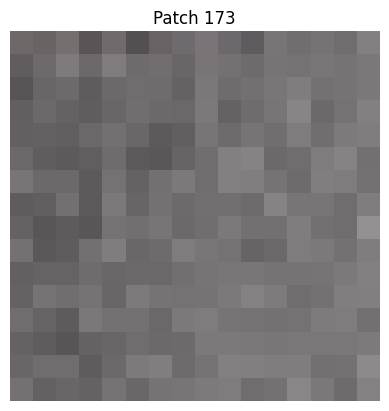

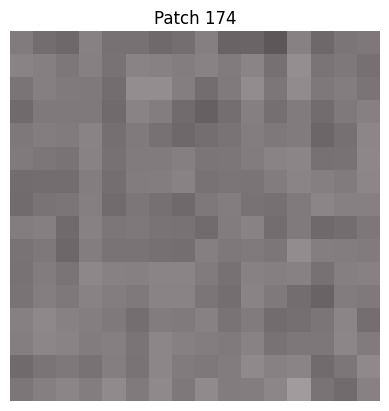

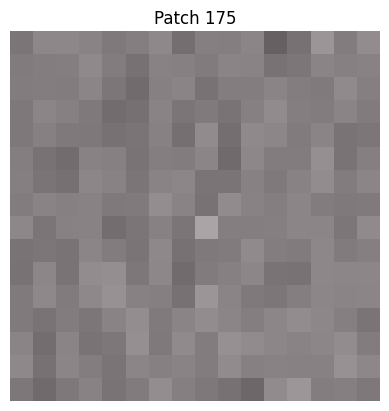

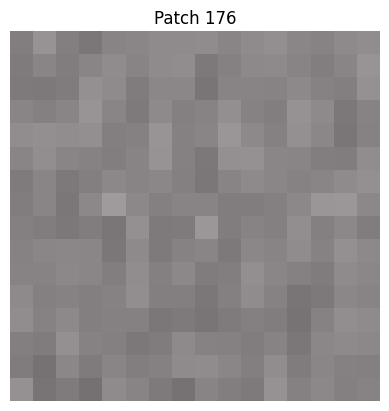

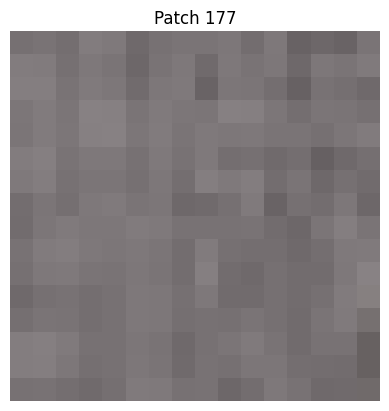

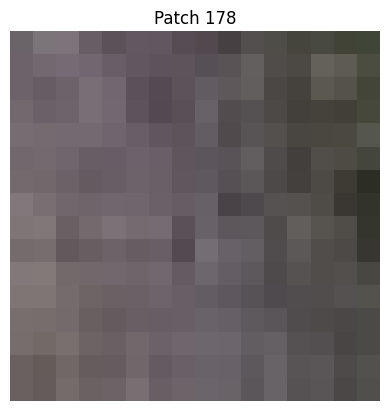

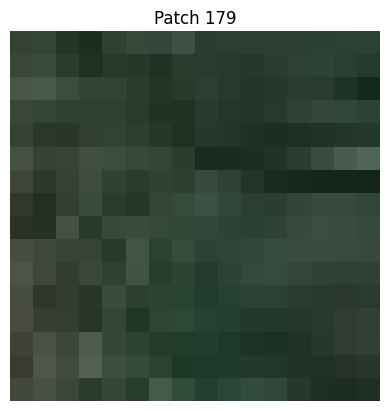

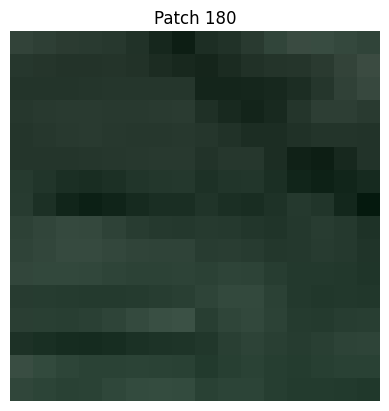

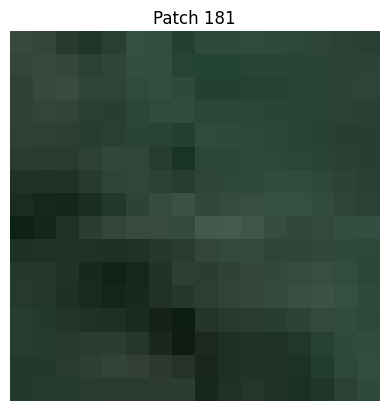

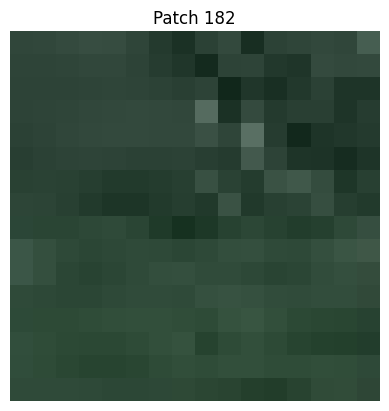

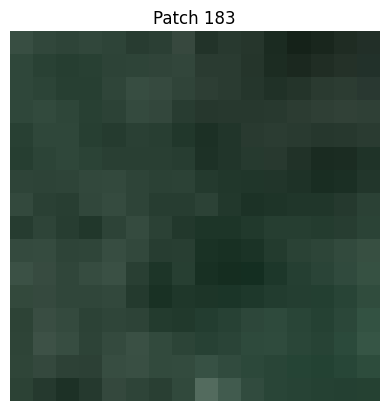

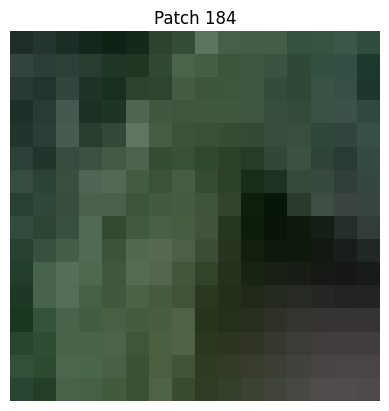

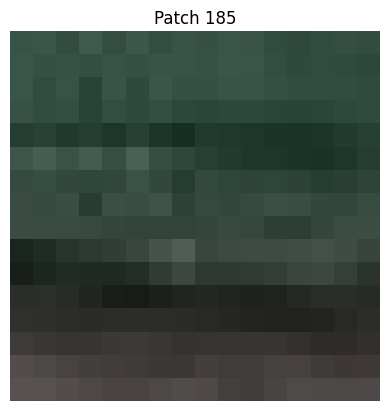

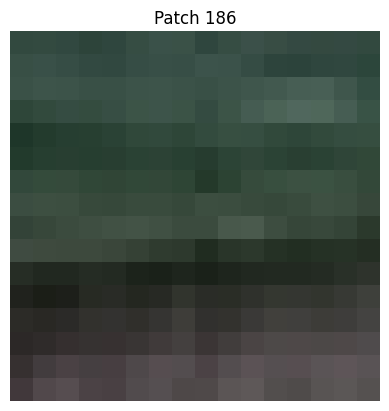

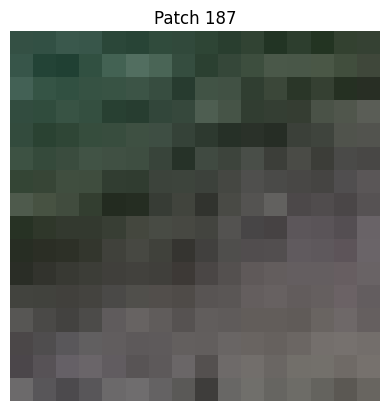

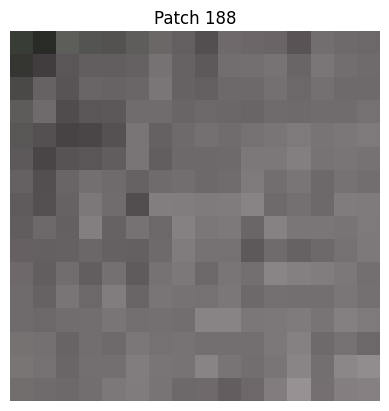

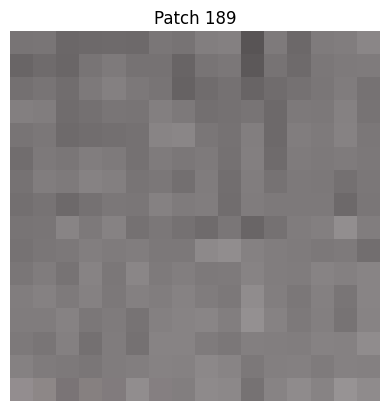

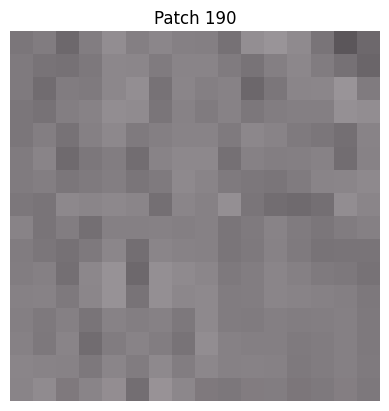

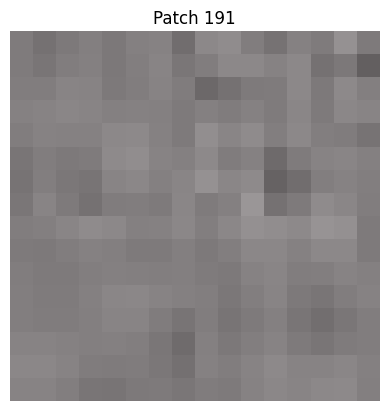

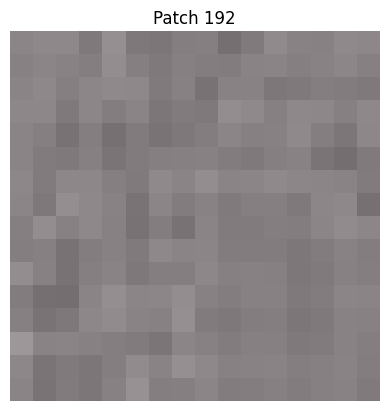

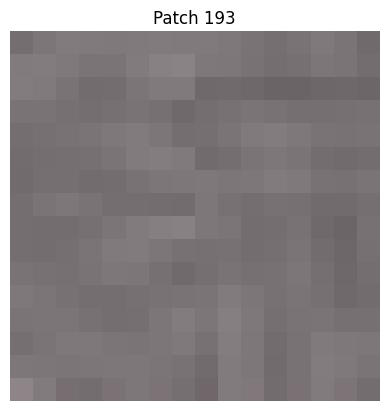

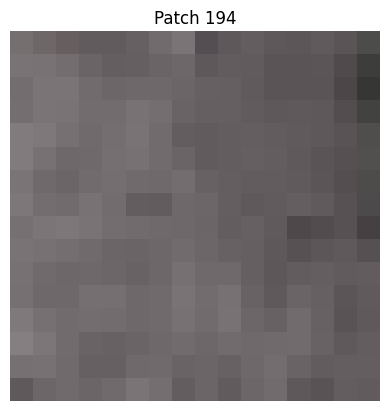

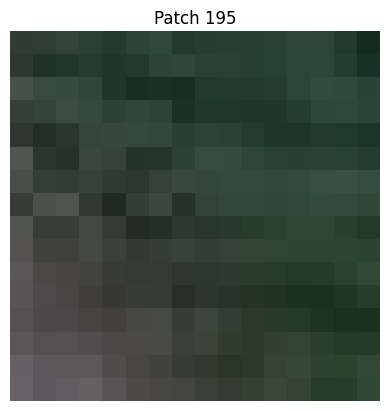

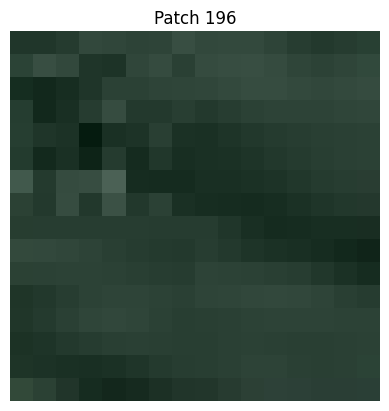

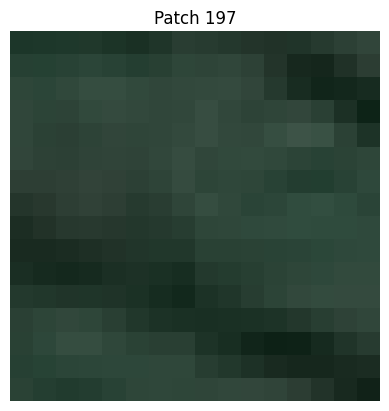

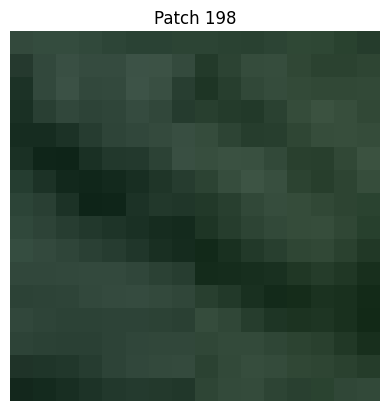

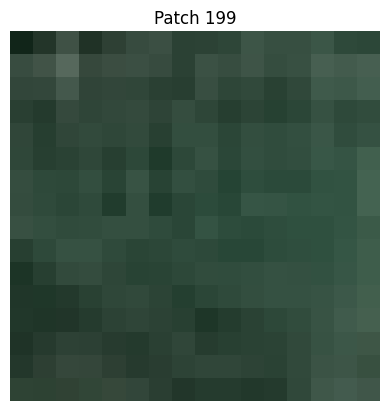

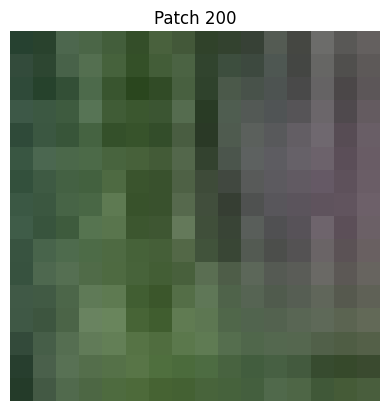

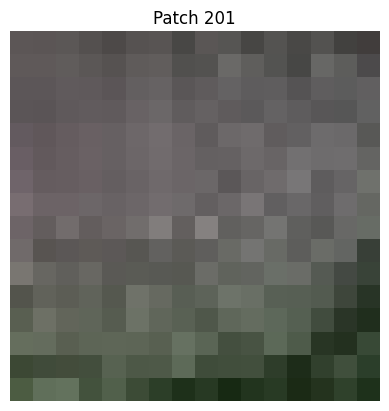

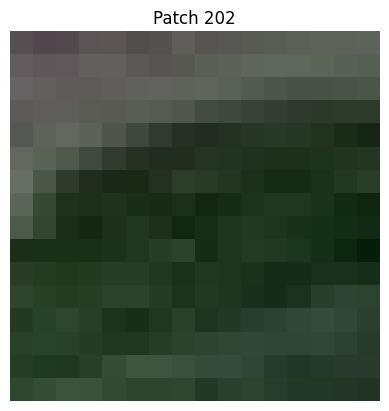

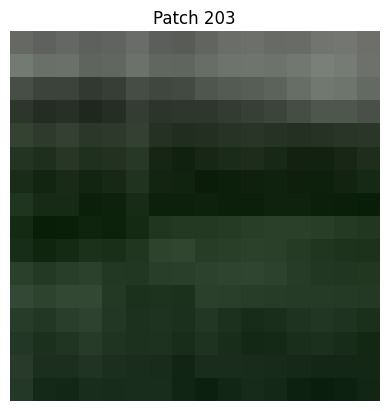

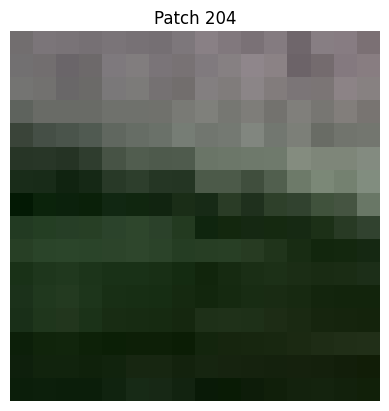

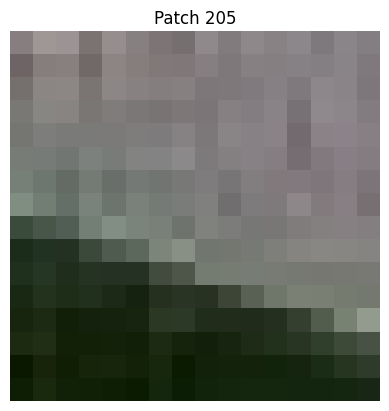

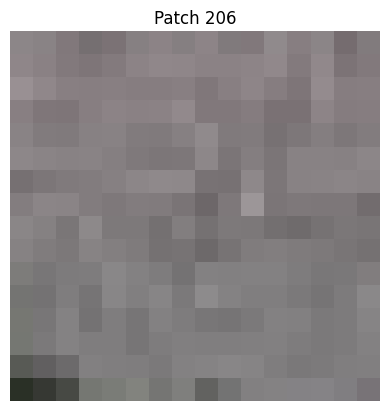

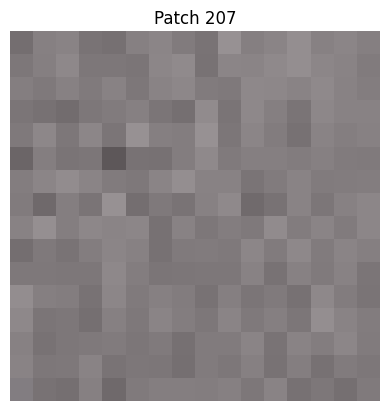

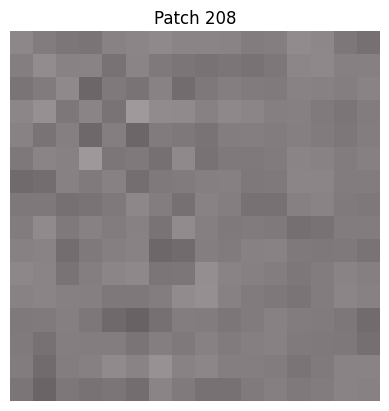

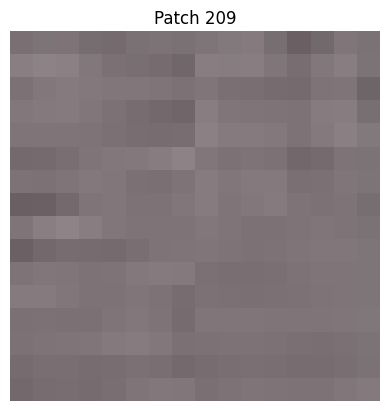

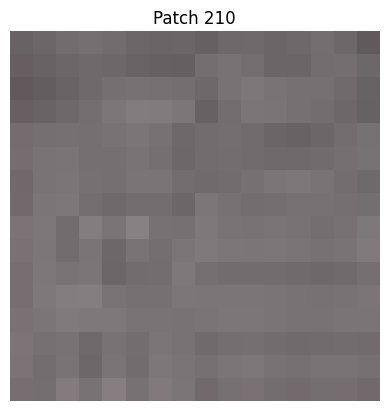

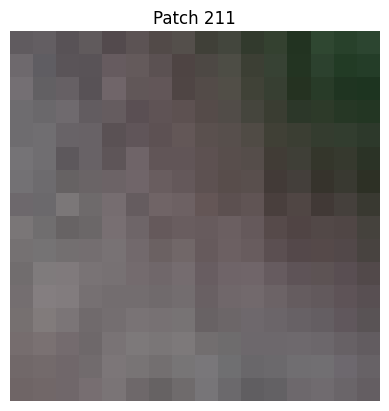

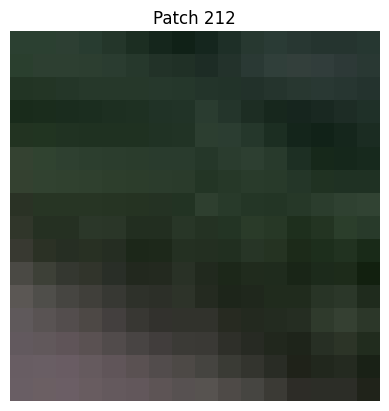

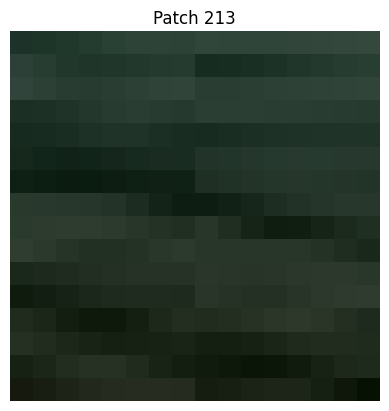

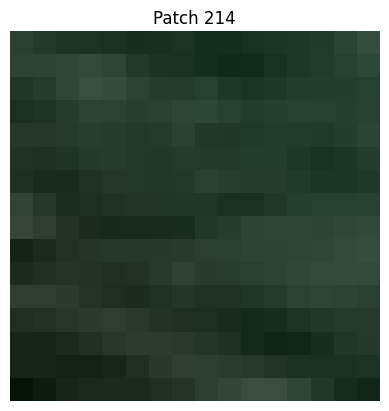

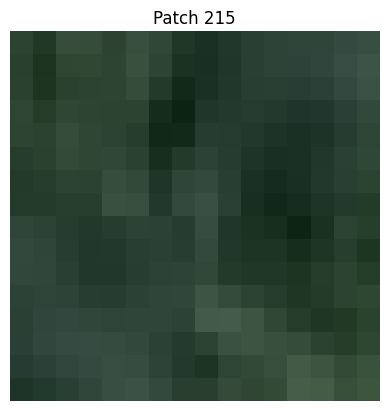

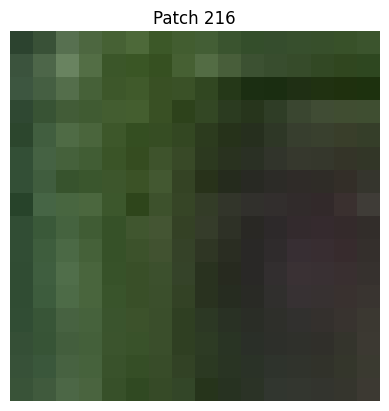

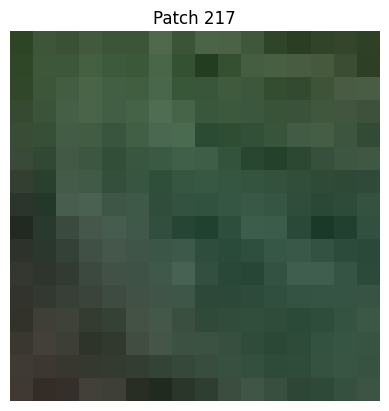

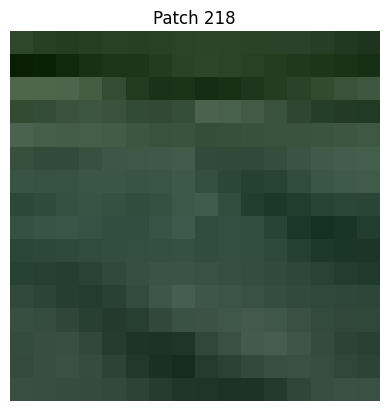

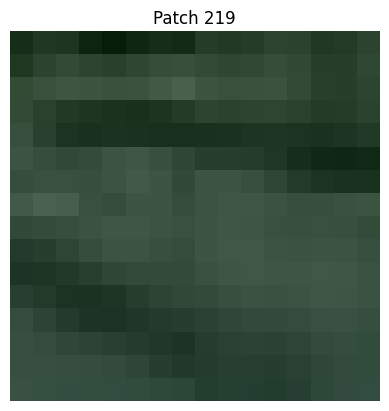

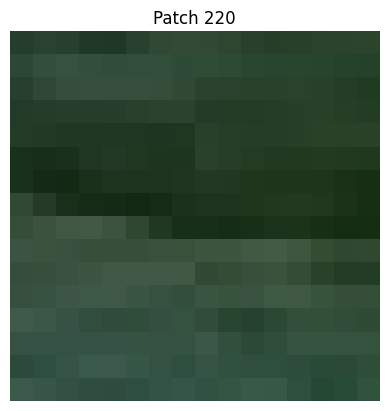

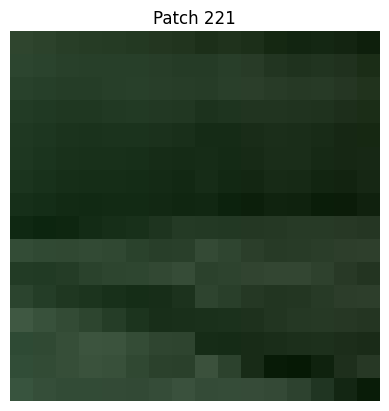

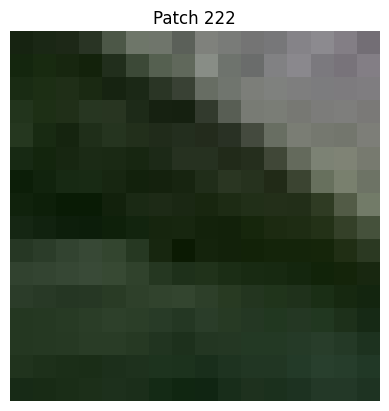

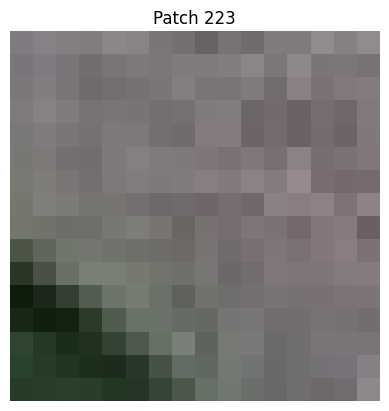

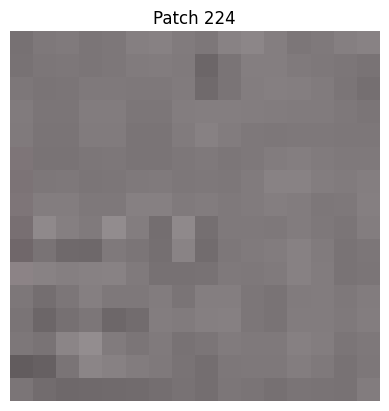

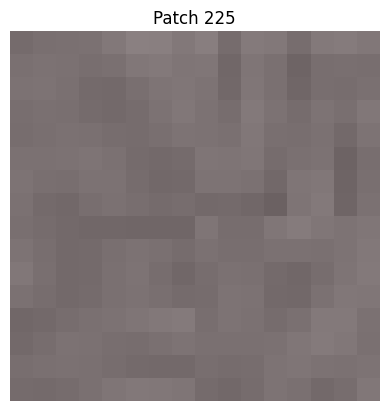

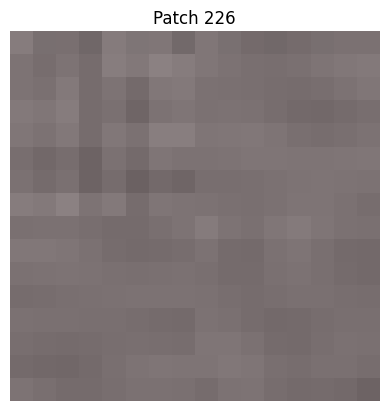

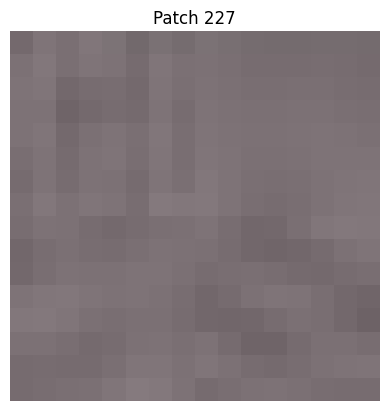

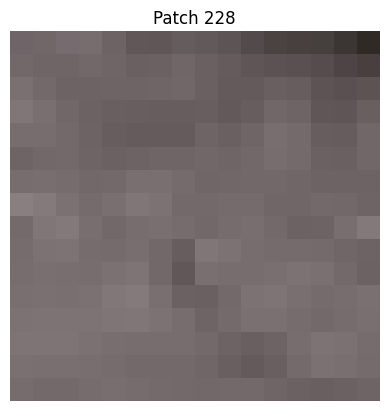

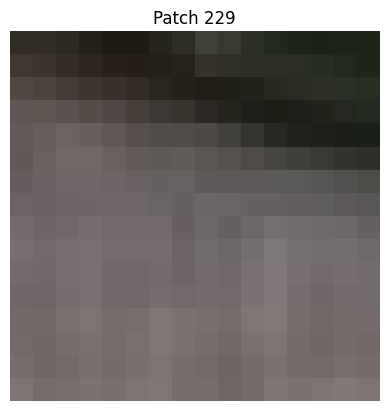

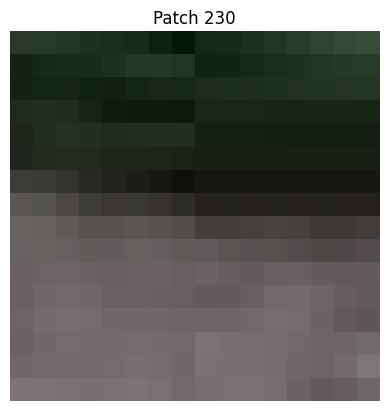

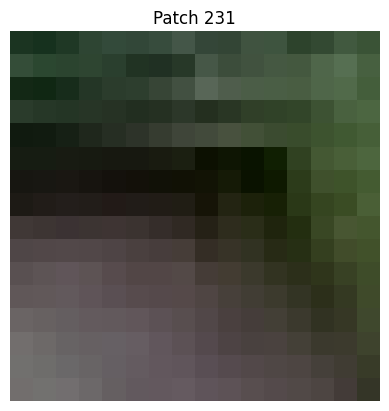

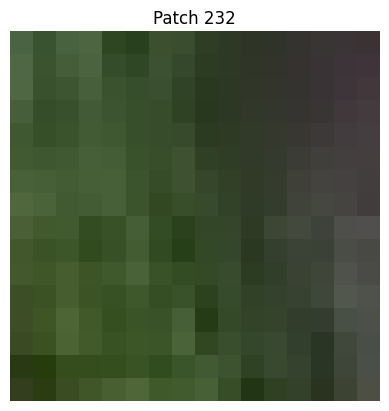

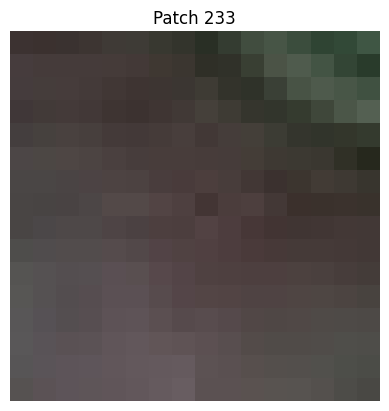

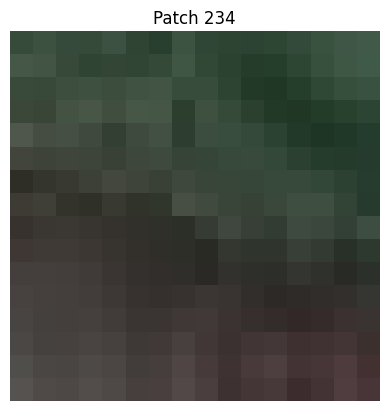

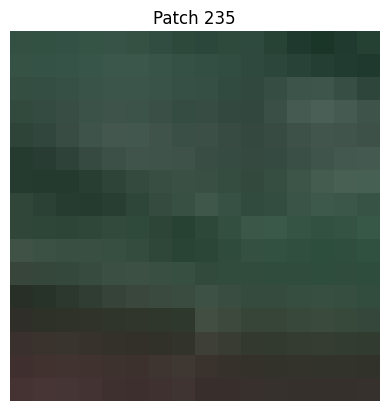

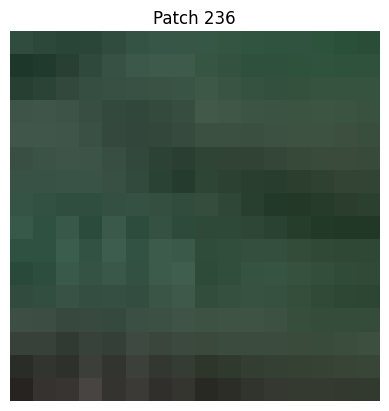

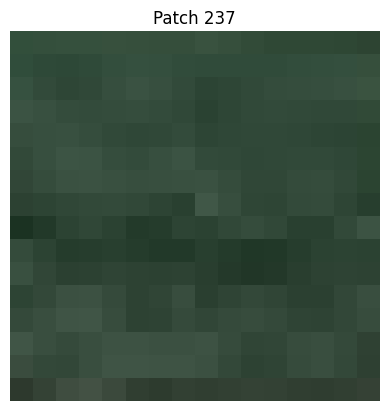

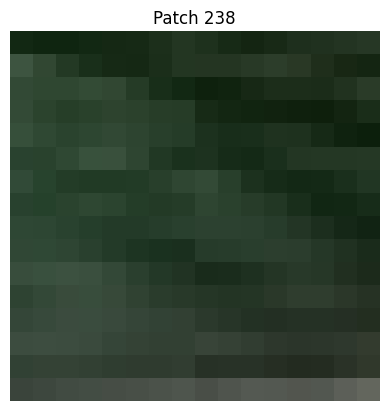

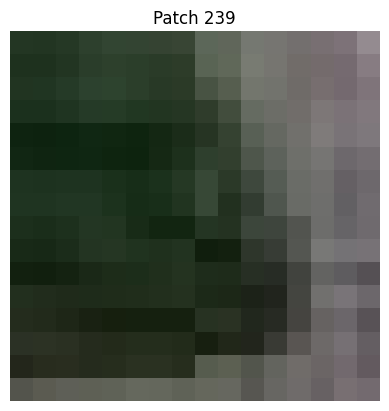

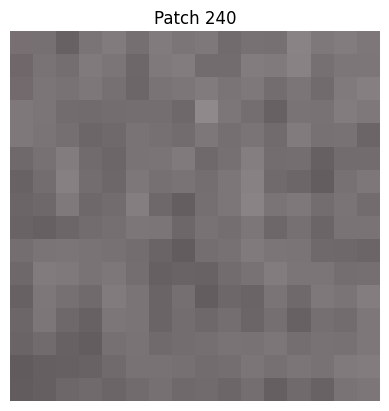

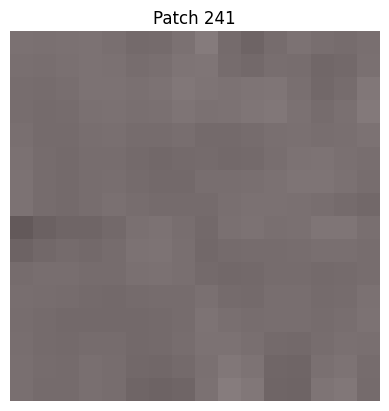

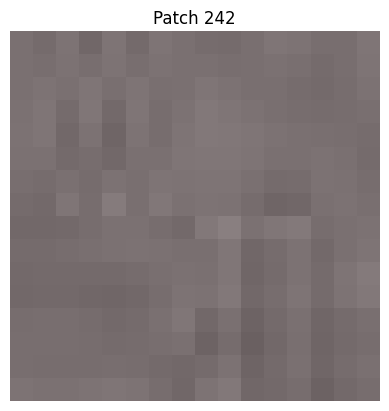

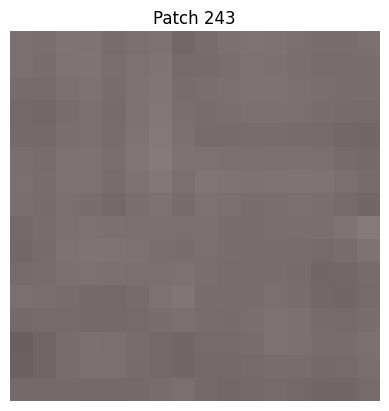

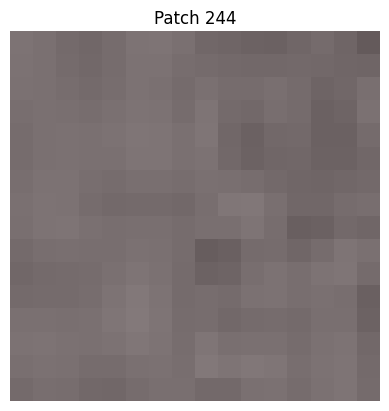

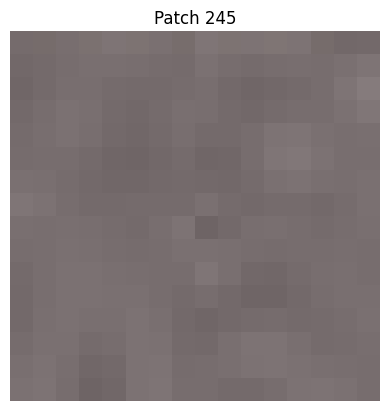

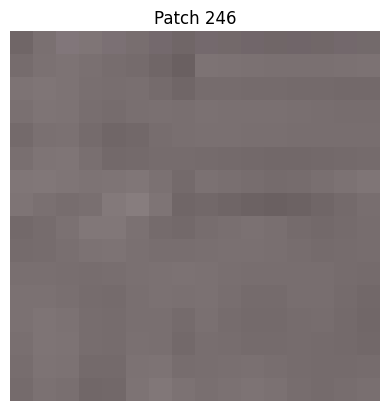

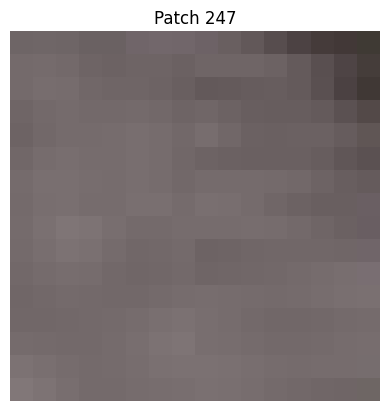

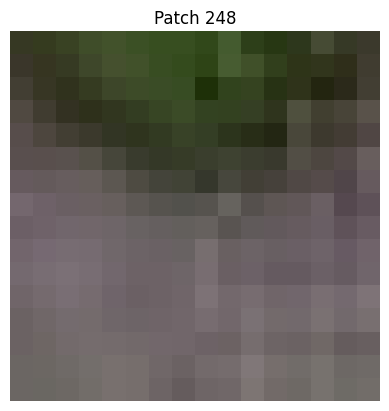

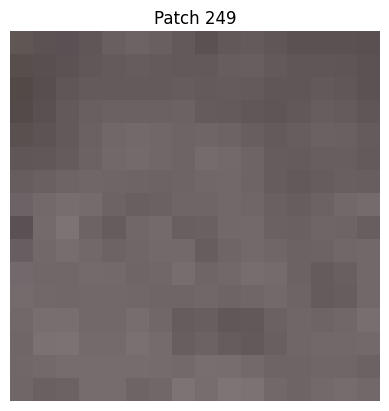

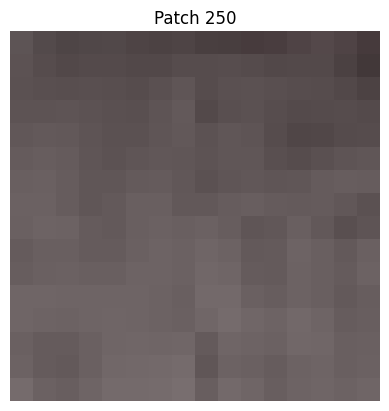

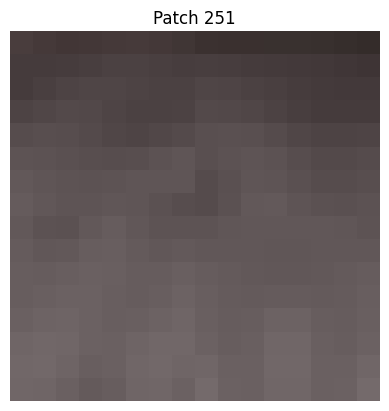

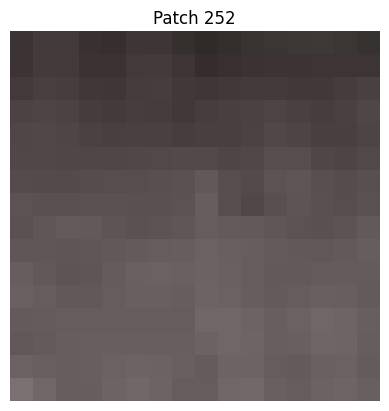

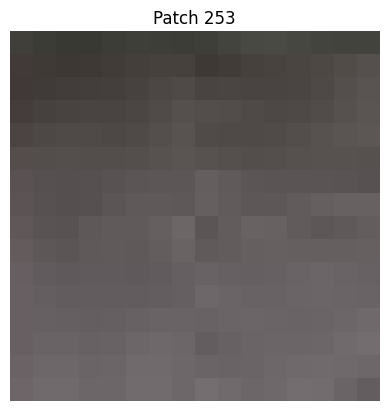

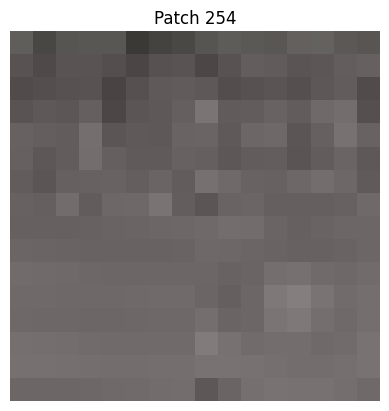

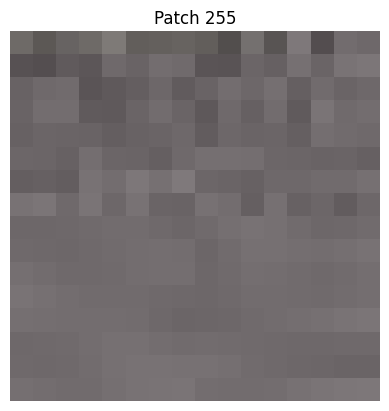

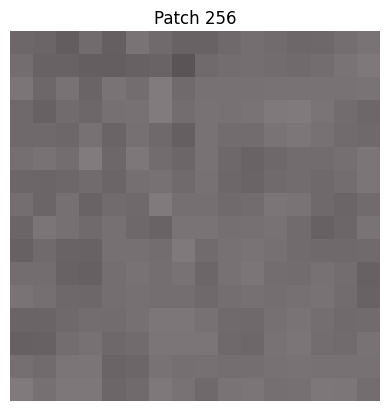

In [7]:
# Display the patches
for idx, patch in enumerate(patches):
    plt.figure()
    plt.imshow(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))
    plt.title(f'Patch {idx + 1}')
    plt.axis('off')

In [8]:
# Create an empty list to store features
features = []

# Iterate through the image to create patches and extract features
for i in range(num_patches_height):
    for j in range(num_patches_width):
        patch = image[i * patch_size[0]: (i + 1) * patch_size[0], j * patch_size[1]: (j + 1) * patch_size[1]]

        # Extract HOG features from the patch
        fd, hog_image = hog(patch, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)

        # Enhance the HOG image for visualization
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

        # Store the features and the HOG image (for visualization) in a tuple
        features.append((fd, hog_image_rescaled))

# Display the patches
for idx, patch in enumerate(patches):
    plt.figure()
    plt.imshow(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))
    plt.title(f'Patch {idx + 1}')
    plt.axis('off')

# Display the HOG images for visualization
for idx, (_, hog_image) in enumerate(features):
    plt.figure()
    plt.imshow(hog_image, cmap=plt.cm.gray)
    plt.title(f'HOG Image for Patch {idx + 1}')
    plt.axis('off')

print("HOG features have been extracted from patches.")

Output hidden; open in https://colab.research.google.com to view.

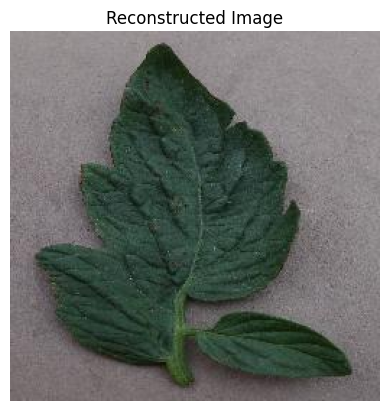

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load the image from Google Drive as previously mentioned
image_path = '/content/drive/MyDrive/Colab Notebooks/Leaf Disease/Tomato_Train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'
image = cv2.imread(image_path)

# Define the patch size (e.g., 128x128)
patch_size = (128, 128)

# Calculate the number of patches in each dimension
num_patches_height = image.shape[0] // patch_size[0]
num_patches_width = image.shape[1] // patch_size[1]

# Create an empty list to store patches
patches = []

# Iterate through the image to create patches
for i in range(num_patches_height):
    for j in range(num_patches_width):
        patch = image[i * patch_size[0]: (i + 1) * patch_size[0], j * patch_size[1]: (j + 1) * patch_size[1]]
        patches.append(patch)

# Combine the patches to reconstruct the original image
reconstructed_image = np.zeros_like(image)
for i in range(num_patches_height):
    for j in range(num_patches_width):
        patch = patches[i * num_patches_width + j]

        # Resize the patch to match the original patch size
        patch = cv2.resize(patch, patch_size[::-1])

        # Determine the coordinates for assignment
        start_x = i * patch_size[0]
        end_x = (i + 1) * patch_size[0]
        start_y = j * patch_size[1]
        end_y = (j + 1) * patch_size[1]

        # Assign the resized patch to the corresponding region in reconstructed_image
        reconstructed_image[start_x:end_x, start_y:end_y] = patch





# Display the reconstructed image
plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
plt.title("Reconstructed Image")
plt.axis('off')
plt.show()




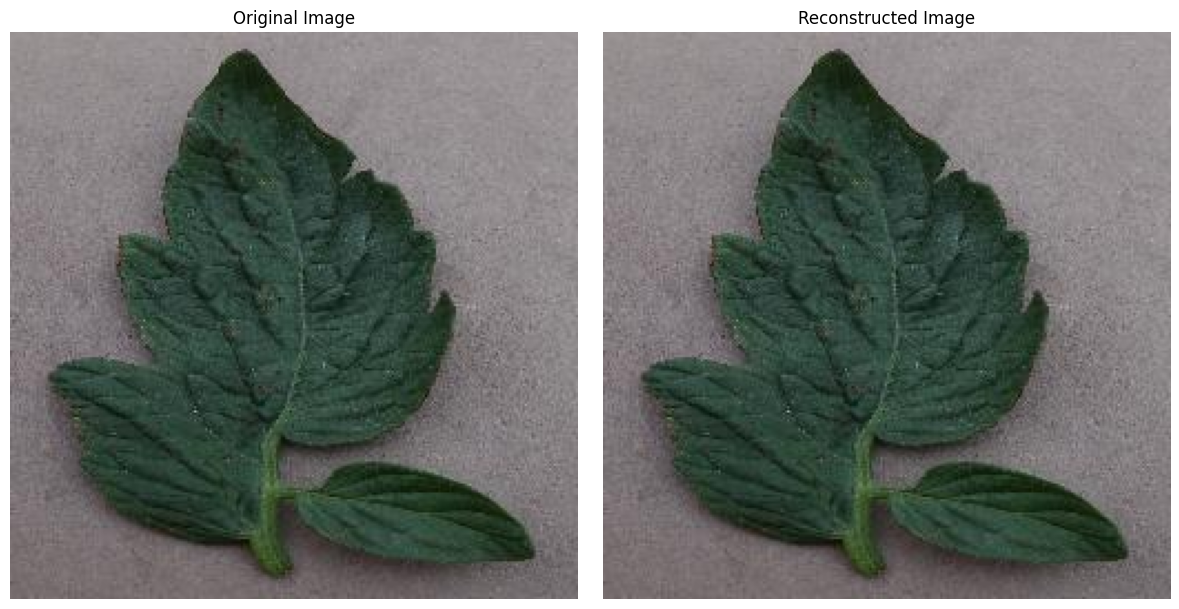

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load the image from Google Drive as previously mentioned
image_path = '/content/drive/MyDrive/Colab Notebooks/Leaf Disease/Tomato_Train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'
image = cv2.imread(image_path)

# Define the patch size (e.g., 128x128)
patch_size = (128, 128)

# Calculate the number of patches in each dimension
num_patches_height = image.shape[0] // patch_size[0]
num_patches_width = image.shape[1] // patch_size[1]

# Create an empty list to store patches
patches = []

# Iterate through the image to create patches
for i in range(num_patches_height):
    for j in range(num_patches_width):
        patch = image[i * patch_size[0]: (i + 1) * patch_size[0], j * patch_size[1]: (j + 1) * patch_size[1]]
        patches.append(patch)

# Combine the patches to reconstruct the original image
reconstructed_image = np.zeros_like(image)
for i in range(num_patches_height):
    for j in range(num_patches_width):
        patch = patches[i * num_patches_width + j]

        # Resize the patch to match the original patch size
        patch = cv2.resize(patch, patch_size[::-1])

        # Determine the coordinates for assignment
        start_x = i * patch_size[0]
        end_x = (i + 1) * patch_size[0]
        start_y = j * patch_size[1]
        end_y = (j + 1) * patch_size[1]

        # Assign the resized patch to the corresponding region in reconstructed_image
        reconstructed_image[start_x:end_x, start_y:end_y] = patch

# Display the original image and reconstructed image side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
plt.title("Reconstructed Image")
plt.axis('off')

plt.tight_layout()
plt.show()


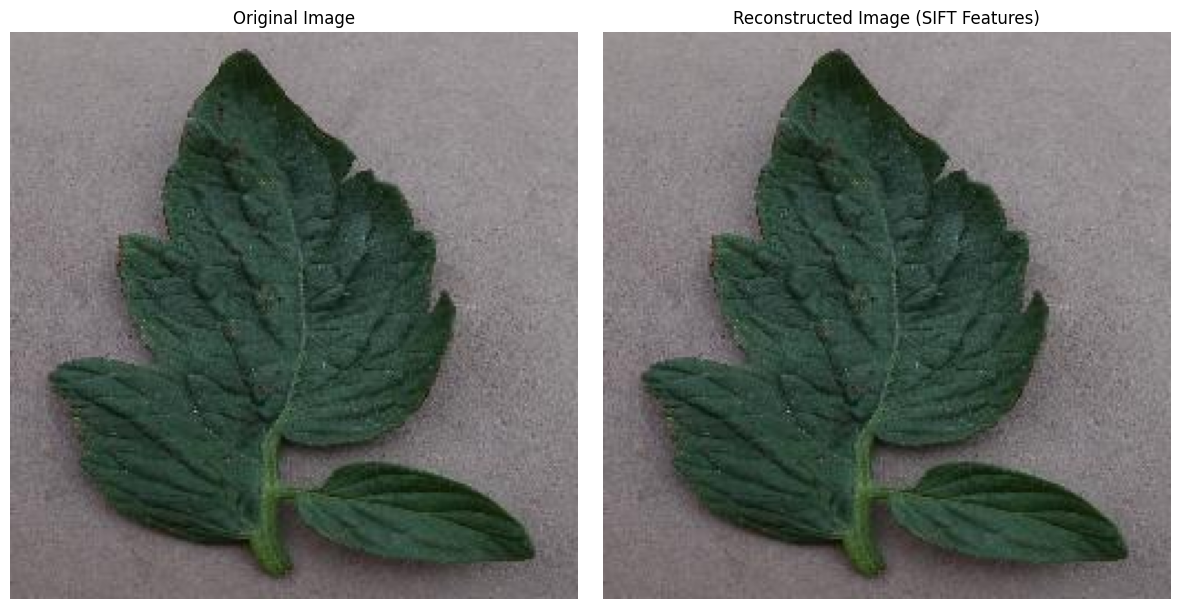

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image from Google Drive as previously mentioned
image_path = '/content/drive/MyDrive/Colab Notebooks/Leaf Disease/Tomato_Train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'
image = cv2.imread(image_path)

# Define the patch size (e.g., 128x128)
patch_size = (128, 128)

# Calculate the number of patches in each dimension
num_patches_height = image.shape[0] // patch_size[0]
num_patches_width = image.shape[1] // patch_size[1]

# Create an empty list to store patches
patches = []

# Iterate through the image to create patches
for i in range(num_patches_height):
    for j in range(num_patches_width):
        patch = image[i * patch_size[0]: (i + 1) * patch_size[0], j * patch_size[1]: (j + 1) * patch_size[1]]
        patches.append(patch)

# Convert patches to grayscale for SIFT feature extraction
gray_patches = [cv2.cvtColor(patch, cv2.COLOR_BGR2GRAY) for patch in patches]

# Create SIFT detector
sift = cv2.SIFT_create()

# Extract SIFT features from patches
sift_features = [sift.detectAndCompute(patch, None)[1] for patch in gray_patches]

# Combine the features to reconstruct the original image
reconstructed_image = np.zeros_like(image)
for i in range(num_patches_height):
    for j in range(num_patches_width):
        patch = patches[i * num_patches_width + j]

        # Determine the coordinates for assignment
        start_x = i * patch_size[0]
        end_x = (i + 1) * patch_size[0]
        start_y = j * patch_size[1]
        end_y = (j + 1) * patch_size[1]

        # Assign the patch to the corresponding region in reconstructed_image
        reconstructed_image[start_x:end_x, start_y:end_y] = patch

# Display the original image and reconstructed image side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
plt.title("Reconstructed Image (SIFT Features)")
plt.axis('off')

plt.tight_layout()
plt.show()


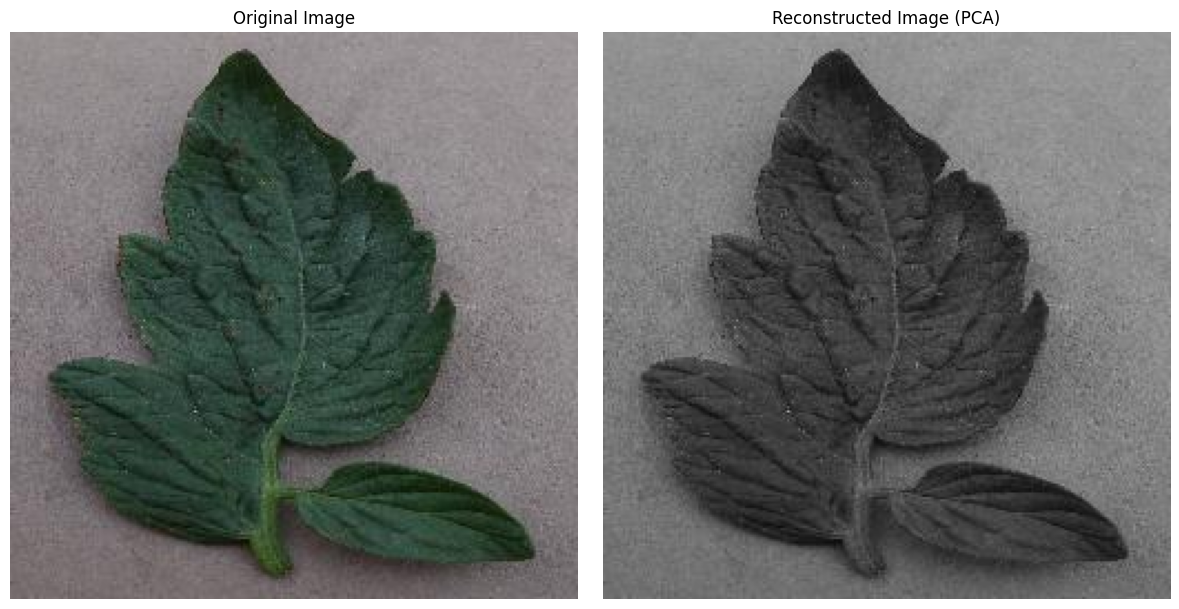

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the image from Google Drive as previously mentioned
image_path = '/content/drive/MyDrive/Colab Notebooks/Leaf Disease/Tomato_Train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'
image = cv2.imread(image_path)

# Define the patch size (e.g., 128x128)
patch_size = (128, 128)

# Calculate the number of patches in each dimension
num_patches_height = image.shape[0] // patch_size[0]
num_patches_width = image.shape[1] // patch_size[1]

# Create an empty list to store patches
patches = []

# Iterate through the image to create patches
for i in range(num_patches_height):
    for j in range(num_patches_width):
        patch = image[i * patch_size[0]: (i + 1) * patch_size[0], j * patch_size[1]: (j + 1) * patch_size[1]]
        patches.append(patch)

# Convert patches to grayscale
gray_patches = [cv2.cvtColor(patch, cv2.COLOR_BGR2GRAY) for patch in patches]

# Flatten the patches
flat_patches = [patch.flatten() for patch in gray_patches]

# Convert to NumPy array
flat_patches = np.array(flat_patches)

# Define a suitable value for n_components (e.g., less than or equal to the number of patches)
n_components = min(num_patches_height * num_patches_width, 100)  # Adjust as needed

# Apply PCA for dimensionality reduction
pca = PCA(n_components=n_components)
reduced_features = pca.fit_transform(flat_patches)

# Reconstruct the patches from reduced features
reconstructed_patches = pca.inverse_transform(reduced_features)

# Reshape the reconstructed patches back to the original size
reconstructed_patches = [patch.reshape(patch_size) for patch in reconstructed_patches]

# Combine the reconstructed patches to reconstruct the original image
reconstructed_image = np.zeros_like(image)
for i in range(num_patches_height):
    for j in range(num_patches_width):
        patch = reconstructed_patches[i * num_patches_width + j]

        # Determine the coordinates for assignment
        start_x = i * patch_size[0]
        end_x = (i + 1) * patch_size[0]
        start_y = j * patch_size[1]
        end_y = (j + 1) * patch_size[1]

        # Assign the resized patch to the corresponding region in reconstructed_image
        reconstructed_image[start_x:end_x, start_y:end_y, :] = cv2.merge([patch, patch, patch])  # Convert to 3 channels

# Display the original image and reconstructed image side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
plt.title("Reconstructed Image (PCA)")
plt.axis('off')

plt.tight_layout()
plt.show()
